In [158]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import math 
import pandas as pd
import seaborn as sns
path =  (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from nuclei_segmentation import preprocessing as pp


Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [159]:
# Set ground truth images from N2DH-GOWT1 dataset and N2DL-HeLa dataset to 0 and 1

def binarize(x):
    img = x.copy()

    for o in np.ndindex(img.shape):
        if img[o] > 0: 
           img[o] = 1
        else:
            img[o] = 0
    
    return img

In [160]:
# Preprocessing - Histogram stretching

def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [161]:
# Load raw images from N2DH-GOWT1-dataset

img_N2DH_GOWT1_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img/t01.tif"))
img_N2DH_GOWT1_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img/t21.tif"))
img_N2DH_GOWT1_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img/t31.tif"))
img_N2DH_GOWT1_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img/t39.tif"))
img_N2DH_GOWT1_5 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img/t52.tif"))
img_N2DH_GOWT1_6 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img/t72.tif"))


# Load ground truth images from N2DH-GOWT1-dataset

gt_N2DH_GOWT1_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt/man_seg01.tif"))
gt_N2DH_GOWT1_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt/man_seg21.tif"))
gt_N2DH_GOWT1_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt/man_seg31.tif"))
gt_N2DH_GOWT1_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt/man_seg39.tif"))
gt_N2DH_GOWT1_5 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt/man_seg52.tif"))
gt_N2DH_GOWT1_6 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt/man_seg72.tif"))


In [162]:
# Load raw images from N2DL-HeLa-dataset

img_N2DL_HeLa_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/img/t13.tif"))
img_N2DL_HeLa_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/img/t52.tif"))
img_N2DL_HeLa_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/img/t75.tif"))
img_N2DL_HeLa_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/img/t79.tif"))


# Load ground truth images from N2Dl-HeLa-dataset

gt_N2DL_HeLa_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/gt/man_seg13.tif"))
gt_N2DL_HeLa_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/gt/man_seg52.tif"))
gt_N2DL_HeLa_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/gt/man_seg75.tif"))
gt_N2DL_HeLa_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/gt/man_seg79.tif"))

In [163]:
# Load raw images of NIH3T3-dataset

img_NIH3T3_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-0.png"))
img_NIH3T3_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-1.png"))
img_NIH3T3_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-26.png"))
img_NIH3T3_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-27.png"))
img_NIH3T3_5 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-28.png"))
img_NIH3T3_6 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-29.png"))
img_NIH3T3_7 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-30.png"))
img_NIH3T3_8 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-31.png"))
img_NIH3T3_9 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-32.png"))
img_NIH3T3_10 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-33.png"))
img_NIH3T3_11 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-37.png"))
img_NIH3T3_12 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-40.png"))
img_NIH3T3_13 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-42.png"))
img_NIH3T3_14 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-44.png"))
img_NIH3T3_15 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-45.png"))
img_NIH3T3_16 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-46.png"))
img_NIH3T3_17 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-47.png"))
img_NIH3T3_18 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/img/dna-49.png"))

# Load ground truth images of NIH3T3-dataset
 
gt_NIH3T3_1 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/0.png"))
gt_NIH3T3_2 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/1.png"))
gt_NIH3T3_3 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/26.png"))
gt_NIH3T3_4 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/27.png"))
gt_NIH3T3_5 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/28.png"))
gt_NIH3T3_6 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/29.png"))
gt_NIH3T3_7 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/30.png"))
gt_NIH3T3_8 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/31.png"))
gt_NIH3T3_9 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/32.png"))
gt_NIH3T3_10 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/33.png"))
gt_NIH3T3_11 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/37.png"))
gt_NIH3T3_12 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/40.png"))
gt_NIH3T3_13 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/42.png"))
gt_NIH3T3_14 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/44.png"))
gt_NIH3T3_15 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/45.png"))
gt_NIH3T3_16 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/46.png"))
gt_NIH3T3_17 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/47.png"))
gt_NIH3T3_18 = imread(os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/NIH3T3/gt/49.png"))

In [164]:
# Reassign the ground truth images from N2DH-GOWT1 dataset and N2DLHeLa dataset

binary_gt_N2DH_GOWT1_1 = binarize(gt_N2DH_GOWT1_1)
binary_gt_N2DH_GOWT1_2 = binarize(gt_N2DH_GOWT1_2)
binary_gt_N2DH_GOWT1_3 = binarize(gt_N2DH_GOWT1_3)
binary_gt_N2DH_GOWT1_4 = binarize(gt_N2DH_GOWT1_4)
binary_gt_N2DH_GOWT1_5 = binarize(gt_N2DH_GOWT1_5)
binary_gt_N2DH_GOWT1_6 = binarize(gt_N2DH_GOWT1_6)

binary_gt_N2DL_HeLa_1 = binarize(gt_N2DL_HeLa_1)
binary_gt_N2DL_HeLa_2 = binarize(gt_N2DL_HeLa_2)
binary_gt_N2DL_HeLa_3 = binarize(gt_N2DL_HeLa_3)
binary_gt_N2DL_HeLa_4 = binarize(gt_N2DL_HeLa_4)

In [165]:
# Make a copy of all images of each dataset / use as "no preprocessed images"

copy_img_N2DH_GOWT1_1 = img_N2DH_GOWT1_1.copy()
copy_img_N2DH_GOWT1_2 = img_N2DH_GOWT1_2.copy()
copy_img_N2DH_GOWT1_3 = img_N2DH_GOWT1_3.copy()
copy_img_N2DH_GOWT1_4 = img_N2DH_GOWT1_4.copy()
copy_img_N2DH_GOWT1_5 = img_N2DH_GOWT1_5.copy()
copy_img_N2DH_GOWT1_6 = img_N2DH_GOWT1_6.copy()


copy_img_N2DL_HeLa_1 = img_N2DL_HeLa_1.copy()
copy_img_N2DL_HeLa_2 = img_N2DL_HeLa_2.copy()
copy_img_N2DL_HeLa_3 = img_N2DL_HeLa_3.copy()
copy_img_N2DL_HeLa_4 = img_N2DL_HeLa_4.copy()


copy_img_NIH3T3_1 = img_NIH3T3_1.copy()
copy_img_NIH3T3_2 = img_NIH3T3_2.copy()
copy_img_NIH3T3_3 = img_NIH3T3_3.copy()
copy_img_NIH3T3_4 = img_NIH3T3_4.copy()
copy_img_NIH3T3_5 = img_NIH3T3_5.copy()
copy_img_NIH3T3_6 = img_NIH3T3_6.copy()
copy_img_NIH3T3_7 = img_NIH3T3_7.copy()
copy_img_NIH3T3_8 = img_NIH3T3_8.copy()
copy_img_NIH3T3_9 = img_NIH3T3_9.copy()
copy_img_NIH3T3_10 = img_NIH3T3_10.copy()
copy_img_NIH3T3_11 = img_NIH3T3_11.copy()
copy_img_NIH3T3_12 = img_NIH3T3_12.copy()
copy_img_NIH3T3_13 = img_NIH3T3_13.copy()
copy_img_NIH3T3_14 = img_NIH3T3_14.copy()
copy_img_NIH3T3_15 = img_NIH3T3_15.copy()
copy_img_NIH3T3_16 = img_NIH3T3_16.copy()
copy_img_NIH3T3_17 = img_NIH3T3_17.copy()
copy_img_NIH3T3_18 = img_NIH3T3_18.copy()

In [166]:
# Apply median filter to all images of each dataset

median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_1, 9)
median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_2, 9)
median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_3, 9)
median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_4, 9)
median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_5, 9)
median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_6, 9)


median_img_N2DL_HeLa_1 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_1, 2)
median_img_N2DL_HeLa_2 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_2, 2)
median_img_N2DL_HeLa_3 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_3, 2)
median_img_N2DL_HeLa_4 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_4, 2)


median_img_NIH3T3_1 = scipy.ndimage.median_filter(copy_img_NIH3T3_1, 16)
median_img_NIH3T3_2 = scipy.ndimage.median_filter(copy_img_NIH3T3_2, 16)
median_img_NIH3T3_3 = scipy.ndimage.median_filter(copy_img_NIH3T3_3, 16)
median_img_NIH3T3_4 = scipy.ndimage.median_filter(copy_img_NIH3T3_4, 16)
median_img_NIH3T3_5 = scipy.ndimage.median_filter(copy_img_NIH3T3_5, 16)
median_img_NIH3T3_6 = scipy.ndimage.median_filter(copy_img_NIH3T3_6, 16)
median_img_NIH3T3_7 = scipy.ndimage.median_filter(copy_img_NIH3T3_7, 16)
median_img_NIH3T3_8 = scipy.ndimage.median_filter(copy_img_NIH3T3_8, 16)
median_img_NIH3T3_9 = scipy.ndimage.median_filter(copy_img_NIH3T3_9, 16)
median_img_NIH3T3_10 = scipy.ndimage.median_filter(copy_img_NIH3T3_10, 16)
median_img_NIH3T3_11 = scipy.ndimage.median_filter(copy_img_NIH3T3_11, 16)
median_img_NIH3T3_12 = scipy.ndimage.median_filter(copy_img_NIH3T3_12, 16)
median_img_NIH3T3_13 = scipy.ndimage.median_filter(copy_img_NIH3T3_13, 16)
median_img_NIH3T3_14 = scipy.ndimage.median_filter(copy_img_NIH3T3_14, 16)
median_img_NIH3T3_15 = scipy.ndimage.median_filter(copy_img_NIH3T3_15, 16)
median_img_NIH3T3_16 = scipy.ndimage.median_filter(copy_img_NIH3T3_16, 16)
median_img_NIH3T3_17 = scipy.ndimage.median_filter(copy_img_NIH3T3_17, 16)
median_img_NIH3T3_18 = scipy.ndimage.median_filter(copy_img_NIH3T3_18, 16)


In [167]:
# Apply gaussian filter to all images of each dataset

gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_1, 9)
gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_2, 9)
gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_3, 9)
gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_4, 9)
gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_5, 9)
gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_6, 9)


gauss_img_N2DL_HeLa_1 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_1, 4)
gauss_img_N2DL_HeLa_2 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_2, 4)
gauss_img_N2DL_HeLa_3 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_3, 4)
gauss_img_N2DL_HeLa_4 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_4, 4)


gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_1, 8)
gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_2, 8)
gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_3, 8)
gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_4, 8)
gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_5, 8)
gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_6, 8)
gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_7, 8)
gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_8, 8)
gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_9, 8)
gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_10, 8)
gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_11, 8)
gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_12, 8)
gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_13, 8)
gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_14, 8)
gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_15, 8)
gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_16, 8)
gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_17, 8)
gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_18, 8)

In [168]:
# Apply histogram stretching to all images of each dataset

stretch_img_N2DH_GOWT1_1 = stretch(copy_img_N2DH_GOWT1_1)
stretch_img_N2DH_GOWT1_2 = stretch(copy_img_N2DH_GOWT1_2)
stretch_img_N2DH_GOWT1_3 = stretch(copy_img_N2DH_GOWT1_3)
stretch_img_N2DH_GOWT1_4 = stretch(copy_img_N2DH_GOWT1_4)
stretch_img_N2DH_GOWT1_5 = stretch(copy_img_N2DH_GOWT1_5)
stretch_img_N2DH_GOWT1_6 = stretch(copy_img_N2DH_GOWT1_6)


stretch_img_N2DL_HeLa_1 = stretch(copy_img_N2DL_HeLa_1)
stretch_img_N2DL_HeLa_2 = stretch(copy_img_N2DL_HeLa_2)
stretch_img_N2DL_HeLa_3 = stretch(copy_img_N2DL_HeLa_3)
stretch_img_N2DL_HeLa_4 = stretch(copy_img_N2DL_HeLa_4)


stretch_img_NIH3T3_1 = stretch(copy_img_NIH3T3_1)
stretch_img_NIH3T3_2 = stretch(copy_img_NIH3T3_2)
stretch_img_NIH3T3_3 = stretch(copy_img_NIH3T3_3)
stretch_img_NIH3T3_4 = stretch(copy_img_NIH3T3_4)
stretch_img_NIH3T3_5 = stretch(copy_img_NIH3T3_5)
stretch_img_NIH3T3_6 = stretch(copy_img_NIH3T3_6)
stretch_img_NIH3T3_7 = stretch(copy_img_NIH3T3_7)
stretch_img_NIH3T3_8 = stretch(copy_img_NIH3T3_8)
stretch_img_NIH3T3_9 = stretch(copy_img_NIH3T3_9)
stretch_img_NIH3T3_10 = stretch(copy_img_NIH3T3_10)
stretch_img_NIH3T3_11 = stretch(copy_img_NIH3T3_11)
stretch_img_NIH3T3_12 = stretch(copy_img_NIH3T3_12)
stretch_img_NIH3T3_13 = stretch(copy_img_NIH3T3_13)
stretch_img_NIH3T3_14 = stretch(copy_img_NIH3T3_14)
stretch_img_NIH3T3_15 = stretch(copy_img_NIH3T3_15)
stretch_img_NIH3T3_16 = stretch(copy_img_NIH3T3_16)
stretch_img_NIH3T3_17 = stretch(copy_img_NIH3T3_17)
stretch_img_NIH3T3_18 = stretch(copy_img_NIH3T3_18)

In [169]:
# Apply median filter and histogram strechting to all images of each dataset

median_stretch_img_N2DH_GOWT1_1 = stretch(median_img_N2DH_GOWT1_1)
median_stretch_img_N2DH_GOWT1_2 = stretch(median_img_N2DH_GOWT1_2)
median_stretch_img_N2DH_GOWT1_3 = stretch(median_img_N2DH_GOWT1_3)
median_stretch_img_N2DH_GOWT1_4 = stretch(median_img_N2DH_GOWT1_4)
median_stretch_img_N2DH_GOWT1_5 = stretch(median_img_N2DH_GOWT1_5)
median_stretch_img_N2DH_GOWT1_6 = stretch(median_img_N2DH_GOWT1_6)


median_stretch_img_N2DL_HeLa_1 = stretch(median_img_N2DL_HeLa_1)
median_stretch_img_N2DL_HeLa_2 = stretch(median_img_N2DL_HeLa_2)
median_stretch_img_N2DL_HeLa_3 = stretch(median_img_N2DL_HeLa_3)
median_stretch_img_N2DL_HeLa_4 = stretch(median_img_N2DL_HeLa_4)


median_stretch_img_NIH3T3_1 = stretch(median_img_NIH3T3_1)
median_stretch_img_NIH3T3_2 = stretch(median_img_NIH3T3_2)
median_stretch_img_NIH3T3_3 = stretch(median_img_NIH3T3_3)
median_stretch_img_NIH3T3_4 = stretch(median_img_NIH3T3_4)
median_stretch_img_NIH3T3_5 = stretch(median_img_NIH3T3_5)
median_stretch_img_NIH3T3_6 = stretch(median_img_NIH3T3_6)
median_stretch_img_NIH3T3_7 = stretch(median_img_NIH3T3_7)
median_stretch_img_NIH3T3_8 = stretch(median_img_NIH3T3_8)
median_stretch_img_NIH3T3_9 = stretch(median_img_NIH3T3_9)
median_stretch_img_NIH3T3_10 = stretch(median_img_NIH3T3_10)
median_stretch_img_NIH3T3_11 = stretch(median_img_NIH3T3_11)
median_stretch_img_NIH3T3_12 = stretch(median_img_NIH3T3_12)
median_stretch_img_NIH3T3_13 = stretch(median_img_NIH3T3_13)
median_stretch_img_NIH3T3_14 = stretch(median_img_NIH3T3_14)
median_stretch_img_NIH3T3_15 = stretch(median_img_NIH3T3_15)
median_stretch_img_NIH3T3_16 = stretch(median_img_NIH3T3_16)
median_stretch_img_NIH3T3_17 = stretch(median_img_NIH3T3_17)
median_stretch_img_NIH3T3_18 = stretch(median_img_NIH3T3_18)

In [170]:
# Apply histogram stretching and median filter to all images of each dataset

stretch_median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_1, 9)
stretch_median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_2, 9)
stretch_median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_3, 9)
stretch_median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_4, 9)
stretch_median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_5, 9)
stretch_median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1_6, 9)


stretch_median_img_N2DL_HeLa_1 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_1, 2)
stretch_median_img_N2DL_HeLa_2 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_2, 2)
stretch_median_img_N2DL_HeLa_3 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_3, 2)
stretch_median_img_N2DL_HeLa_4 = scipy.ndimage.median_filter(stretch_img_N2DL_HeLa_4, 2)


stretch_median_img_NIH3T3_1 = scipy.ndimage.median_filter(stretch_img_NIH3T3_1, 16)
stretch_median_img_NIH3T3_2 = scipy.ndimage.median_filter(stretch_img_NIH3T3_2, 16)
stretch_median_img_NIH3T3_3 = scipy.ndimage.median_filter(stretch_img_NIH3T3_3, 16)
stretch_median_img_NIH3T3_4 = scipy.ndimage.median_filter(stretch_img_NIH3T3_4, 16)
stretch_median_img_NIH3T3_5 = scipy.ndimage.median_filter(stretch_img_NIH3T3_5, 16)
stretch_median_img_NIH3T3_6 = scipy.ndimage.median_filter(stretch_img_NIH3T3_6, 16)
stretch_median_img_NIH3T3_7 = scipy.ndimage.median_filter(stretch_img_NIH3T3_7, 16)
stretch_median_img_NIH3T3_8 = scipy.ndimage.median_filter(stretch_img_NIH3T3_8, 16)
stretch_median_img_NIH3T3_9 = scipy.ndimage.median_filter(stretch_img_NIH3T3_9, 16)
stretch_median_img_NIH3T3_10 = scipy.ndimage.median_filter(stretch_img_NIH3T3_10, 16)
stretch_median_img_NIH3T3_11 = scipy.ndimage.median_filter(stretch_img_NIH3T3_11, 16)
stretch_median_img_NIH3T3_12 = scipy.ndimage.median_filter(stretch_img_NIH3T3_12, 16)
stretch_median_img_NIH3T3_13 = scipy.ndimage.median_filter(stretch_img_NIH3T3_13, 16)
stretch_median_img_NIH3T3_14 = scipy.ndimage.median_filter(stretch_img_NIH3T3_14, 16)
stretch_median_img_NIH3T3_15 = scipy.ndimage.median_filter(stretch_img_NIH3T3_15, 16)
stretch_median_img_NIH3T3_16 = scipy.ndimage.median_filter(stretch_img_NIH3T3_16, 16)
stretch_median_img_NIH3T3_17 = scipy.ndimage.median_filter(stretch_img_NIH3T3_17, 16)
stretch_median_img_NIH3T3_18 = scipy.ndimage.median_filter(stretch_img_NIH3T3_18, 16)

In [171]:
# Apply gaussian filter and histogram strechting to all images of each dataset

gauss_stretch_img_N2DH_GOWT1_1 = stretch(gauss_img_N2DH_GOWT1_1)
gauss_stretch_img_N2DH_GOWT1_2 = stretch(gauss_img_N2DH_GOWT1_2)
gauss_stretch_img_N2DH_GOWT1_3 = stretch(gauss_img_N2DH_GOWT1_3)
gauss_stretch_img_N2DH_GOWT1_4 = stretch(gauss_img_N2DH_GOWT1_4)
gauss_stretch_img_N2DH_GOWT1_5 = stretch(gauss_img_N2DH_GOWT1_5)
gauss_stretch_img_N2DH_GOWT1_6 = stretch(gauss_img_N2DH_GOWT1_6)


gauss_stretch_img_N2DL_HeLa_1 = stretch(gauss_img_N2DL_HeLa_1)
gauss_stretch_img_N2DL_HeLa_2 = stretch(gauss_img_N2DL_HeLa_2)
gauss_stretch_img_N2DL_HeLa_3 = stretch(gauss_img_N2DL_HeLa_3)
gauss_stretch_img_N2DL_HeLa_4 = stretch(gauss_img_N2DL_HeLa_4)


gauss_stretch_img_NIH3T3_1 = stretch(gauss_img_NIH3T3_1)
gauss_stretch_img_NIH3T3_2 = stretch(gauss_img_NIH3T3_2)
gauss_stretch_img_NIH3T3_3 = stretch(gauss_img_NIH3T3_3)
gauss_stretch_img_NIH3T3_4 = stretch(gauss_img_NIH3T3_4)
gauss_stretch_img_NIH3T3_5 = stretch(gauss_img_NIH3T3_5)
gauss_stretch_img_NIH3T3_6 = stretch(gauss_img_NIH3T3_6)
gauss_stretch_img_NIH3T3_7 = stretch(gauss_img_NIH3T3_7)
gauss_stretch_img_NIH3T3_8 = stretch(gauss_img_NIH3T3_8)
gauss_stretch_img_NIH3T3_9 = stretch(gauss_img_NIH3T3_9)
gauss_stretch_img_NIH3T3_10 = stretch(gauss_img_NIH3T3_10)
gauss_stretch_img_NIH3T3_11 = stretch(gauss_img_NIH3T3_11)
gauss_stretch_img_NIH3T3_12 = stretch(gauss_img_NIH3T3_12)
gauss_stretch_img_NIH3T3_13 = stretch(gauss_img_NIH3T3_13)
gauss_stretch_img_NIH3T3_14 = stretch(gauss_img_NIH3T3_14)
gauss_stretch_img_NIH3T3_15 = stretch(gauss_img_NIH3T3_15)
gauss_stretch_img_NIH3T3_16 = stretch(gauss_img_NIH3T3_16)
gauss_stretch_img_NIH3T3_17 = stretch(gauss_img_NIH3T3_17)
gauss_stretch_img_NIH3T3_18 = stretch(gauss_img_NIH3T3_18)

In [172]:
# Apply histogram stretching and gaussian filter to all images of each dataset

stretch_gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_1, 9)
stretch_gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_2, 9)
stretch_gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_3, 9)
stretch_gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_4, 9)
stretch_gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_5, 9)
stretch_gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1_6, 9)


stretch_gauss_img_N2DL_HeLa_1 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_1, 4)
stretch_gauss_img_N2DL_HeLa_2 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_2, 4)
stretch_gauss_img_N2DL_HeLa_3 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_3, 4)
stretch_gauss_img_N2DL_HeLa_4 = scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa_4, 4)


stretch_gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_1, 8)
stretch_gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_2, 8)
stretch_gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_3, 8)
stretch_gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_4, 8)
stretch_gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_5, 8)
stretch_gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_6, 8)
stretch_gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_7, 8)
stretch_gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_8, 8)
stretch_gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_9, 8)
stretch_gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_10, 8)
stretch_gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_11, 8)
stretch_gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_12, 8)
stretch_gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_13, 8)
stretch_gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_14, 8)
stretch_gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_15, 8)
stretch_gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_16, 8)
stretch_gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_17, 8)
stretch_gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(stretch_img_NIH3T3_18, 8)

In [173]:
# Apply otsu thresholding to all images of each dataset - no preprocessing

otsu_img_N2DH_GOWT1_1 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_1 , 256)
otsu_img_N2DH_GOWT1_2 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_2 , 256)
otsu_img_N2DH_GOWT1_3 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_3 , 256)
otsu_img_N2DH_GOWT1_4 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_4 , 256)
otsu_img_N2DH_GOWT1_5 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_5 , 256)
otsu_img_N2DH_GOWT1_6 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_6 , 256)


otsu_img_N2DL_HeLa_1 = ot.otsu_thresholding(copy_img_N2DL_HeLa_1 , 256) 
otsu_img_N2DL_HeLa_2 = ot.otsu_thresholding(copy_img_N2DL_HeLa_2 , 256) 
otsu_img_N2DL_HeLa_3 = ot.otsu_thresholding(copy_img_N2DL_HeLa_3 , 256) 
otsu_img_N2DL_HeLa_4 = ot.otsu_thresholding(copy_img_N2DL_HeLa_4 , 256) 


otsu_img_NIH3T3_1 = ot.otsu_thresholding(copy_img_NIH3T3_1 , 256)
otsu_img_NIH3T3_2 = ot.otsu_thresholding(copy_img_NIH3T3_2 , 256)
otsu_img_NIH3T3_3 = ot.otsu_thresholding(copy_img_NIH3T3_3 , 256)
otsu_img_NIH3T3_4 = ot.otsu_thresholding(copy_img_NIH3T3_4 , 256)
otsu_img_NIH3T3_5 = ot.otsu_thresholding(copy_img_NIH3T3_5 , 256)
otsu_img_NIH3T3_6 = ot.otsu_thresholding(copy_img_NIH3T3_6 , 256)
otsu_img_NIH3T3_7 = ot.otsu_thresholding(copy_img_NIH3T3_7 , 256)
otsu_img_NIH3T3_8 = ot.otsu_thresholding(copy_img_NIH3T3_8 , 256)
otsu_img_NIH3T3_9 = ot.otsu_thresholding(copy_img_NIH3T3_9 , 256)
otsu_img_NIH3T3_10 = ot.otsu_thresholding(copy_img_NIH3T3_10 , 256)
otsu_img_NIH3T3_11 = ot.otsu_thresholding(copy_img_NIH3T3_11 , 256)
otsu_img_NIH3T3_12 = ot.otsu_thresholding(copy_img_NIH3T3_12 , 256)
otsu_img_NIH3T3_13 = ot.otsu_thresholding(copy_img_NIH3T3_13 , 256)
otsu_img_NIH3T3_14 = ot.otsu_thresholding(copy_img_NIH3T3_14 , 256)
otsu_img_NIH3T3_15 = ot.otsu_thresholding(copy_img_NIH3T3_15 , 256)
otsu_img_NIH3T3_16 = ot.otsu_thresholding(copy_img_NIH3T3_16 , 256)
otsu_img_NIH3T3_17 = ot.otsu_thresholding(copy_img_NIH3T3_17 , 256)
otsu_img_NIH3T3_18 = ot.otsu_thresholding(copy_img_NIH3T3_18 , 256)

In [174]:
# Apply otsu thresholding to all images of each dataset - median filter

otsu_median_img_N2DH_GOWT1_1 = ot.otsu_thresholding(median_img_N2DH_GOWT1_1 , 256)
otsu_median_img_N2DH_GOWT1_2 = ot.otsu_thresholding(median_img_N2DH_GOWT1_2 , 256)
otsu_median_img_N2DH_GOWT1_3 = ot.otsu_thresholding(median_img_N2DH_GOWT1_3 , 256)
otsu_median_img_N2DH_GOWT1_4 = ot.otsu_thresholding(median_img_N2DH_GOWT1_4 , 256)
otsu_median_img_N2DH_GOWT1_5 = ot.otsu_thresholding(median_img_N2DH_GOWT1_5 , 256)
otsu_median_img_N2DH_GOWT1_6 = ot.otsu_thresholding(median_img_N2DH_GOWT1_6 , 256)


otsu_median_img_N2DL_HeLa_1 = ot.otsu_thresholding(median_img_N2DL_HeLa_1 , 256) 
otsu_median_img_N2DL_HeLa_2 = ot.otsu_thresholding(median_img_N2DL_HeLa_2 , 256) 
otsu_median_img_N2DL_HeLa_3 = ot.otsu_thresholding(median_img_N2DL_HeLa_3 , 256) 
otsu_median_img_N2DL_HeLa_4 = ot.otsu_thresholding(median_img_N2DL_HeLa_4 , 256) 


otsu_median_img_NIH3T3_1 = ot.otsu_thresholding(median_img_NIH3T3_1 , 256)
otsu_median_img_NIH3T3_2 = ot.otsu_thresholding(median_img_NIH3T3_2 , 256)
otsu_median_img_NIH3T3_3 = ot.otsu_thresholding(median_img_NIH3T3_3 , 256)
otsu_median_img_NIH3T3_4 = ot.otsu_thresholding(median_img_NIH3T3_4 , 256)
otsu_median_img_NIH3T3_5 = ot.otsu_thresholding(median_img_NIH3T3_5 , 256)
otsu_median_img_NIH3T3_6 = ot.otsu_thresholding(median_img_NIH3T3_6 , 256)
otsu_median_img_NIH3T3_7 = ot.otsu_thresholding(median_img_NIH3T3_7 , 256)
otsu_median_img_NIH3T3_8 = ot.otsu_thresholding(median_img_NIH3T3_8 , 256)
otsu_median_img_NIH3T3_9 = ot.otsu_thresholding(median_img_NIH3T3_9 , 256)
otsu_median_img_NIH3T3_10 = ot.otsu_thresholding(median_img_NIH3T3_10 , 256)
otsu_median_img_NIH3T3_11 = ot.otsu_thresholding(median_img_NIH3T3_11 , 256)
otsu_median_img_NIH3T3_12 = ot.otsu_thresholding(median_img_NIH3T3_12 , 256)
otsu_median_img_NIH3T3_13 = ot.otsu_thresholding(median_img_NIH3T3_13 , 256)
otsu_median_img_NIH3T3_14 = ot.otsu_thresholding(median_img_NIH3T3_14 , 256)
otsu_median_img_NIH3T3_15 = ot.otsu_thresholding(median_img_NIH3T3_15 , 256)
otsu_median_img_NIH3T3_16 = ot.otsu_thresholding(median_img_NIH3T3_16 , 256)
otsu_median_img_NIH3T3_17 = ot.otsu_thresholding(median_img_NIH3T3_17 , 256)
otsu_median_img_NIH3T3_18 = ot.otsu_thresholding(median_img_NIH3T3_18 , 256)

In [175]:
# Apply otsu thresholding to all images of each dataset - gaussian filter
otsu_gauss_img_N2DH_GOWT1_1 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_1 , 256)
otsu_gauss_img_N2DH_GOWT1_2 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_2 , 256)
otsu_gauss_img_N2DH_GOWT1_3 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_3 , 256)
otsu_gauss_img_N2DH_GOWT1_4 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_4 , 256)
otsu_gauss_img_N2DH_GOWT1_5 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_5 , 256)
otsu_gauss_img_N2DH_GOWT1_6 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_6 , 256)


otsu_gauss_img_N2DL_HeLa_1 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_1 , 256) 
otsu_gauss_img_N2DL_HeLa_2 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_2 , 256) 
otsu_gauss_img_N2DL_HeLa_3 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_3 , 256) 
otsu_gauss_img_N2DL_HeLa_4 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_4 , 256) 


otsu_gauss_img_NIH3T3_1 = ot.otsu_thresholding(gauss_img_NIH3T3_1 , 256)
otsu_gauss_img_NIH3T3_2 = ot.otsu_thresholding(gauss_img_NIH3T3_2 , 256)
otsu_gauss_img_NIH3T3_3 = ot.otsu_thresholding(gauss_img_NIH3T3_3 , 256)
otsu_gauss_img_NIH3T3_4 = ot.otsu_thresholding(gauss_img_NIH3T3_4 , 256)
otsu_gauss_img_NIH3T3_5 = ot.otsu_thresholding(gauss_img_NIH3T3_5 , 256)
otsu_gauss_img_NIH3T3_6 = ot.otsu_thresholding(gauss_img_NIH3T3_6 , 256)
otsu_gauss_img_NIH3T3_7 = ot.otsu_thresholding(gauss_img_NIH3T3_7 , 256)
otsu_gauss_img_NIH3T3_8 = ot.otsu_thresholding(gauss_img_NIH3T3_8 , 256)
otsu_gauss_img_NIH3T3_9 = ot.otsu_thresholding(gauss_img_NIH3T3_9 , 256)
otsu_gauss_img_NIH3T3_10 = ot.otsu_thresholding(gauss_img_NIH3T3_10 , 256)
otsu_gauss_img_NIH3T3_11 = ot.otsu_thresholding(gauss_img_NIH3T3_11 , 256)
otsu_gauss_img_NIH3T3_12 = ot.otsu_thresholding(gauss_img_NIH3T3_12 , 256)
otsu_gauss_img_NIH3T3_13 = ot.otsu_thresholding(gauss_img_NIH3T3_13 , 256)
otsu_gauss_img_NIH3T3_14 = ot.otsu_thresholding(gauss_img_NIH3T3_14 , 256)
otsu_gauss_img_NIH3T3_15 = ot.otsu_thresholding(gauss_img_NIH3T3_15 , 256)
otsu_gauss_img_NIH3T3_16 = ot.otsu_thresholding(gauss_img_NIH3T3_16 , 256)
otsu_gauss_img_NIH3T3_17 = ot.otsu_thresholding(gauss_img_NIH3T3_17 , 256)
otsu_gauss_img_NIH3T3_18 = ot.otsu_thresholding(gauss_img_NIH3T3_18 , 256)


In [176]:
# Apply otsu thresholding to all images of each dataset - histogram stretching
otsu_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_1 , 256)
otsu_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_2 , 256)
otsu_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_3 , 256)
otsu_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_4 , 256)
otsu_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_5 , 256)
otsu_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_6 , 256)


otsu_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_1 , 256) 
otsu_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_2 , 256) 
otsu_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_3 , 256) 
otsu_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_4 , 256) 

otsu_stretch_img_NIH3T3_1 = ot.otsu_thresholding(stretch_img_NIH3T3_1 , 256)
otsu_stretch_img_NIH3T3_2 = ot.otsu_thresholding(stretch_img_NIH3T3_2 , 256)
otsu_stretch_img_NIH3T3_3 = ot.otsu_thresholding(stretch_img_NIH3T3_3 , 256)
otsu_stretch_img_NIH3T3_4 = ot.otsu_thresholding(stretch_img_NIH3T3_4 , 256)
otsu_stretch_img_NIH3T3_5 = ot.otsu_thresholding(stretch_img_NIH3T3_5 , 256)
otsu_stretch_img_NIH3T3_6 = ot.otsu_thresholding(stretch_img_NIH3T3_6 , 256)
otsu_stretch_img_NIH3T3_7 = ot.otsu_thresholding(stretch_img_NIH3T3_7 , 256)
otsu_stretch_img_NIH3T3_8 = ot.otsu_thresholding(stretch_img_NIH3T3_8 , 256)
otsu_stretch_img_NIH3T3_9 = ot.otsu_thresholding(stretch_img_NIH3T3_9 , 256)
otsu_stretch_img_NIH3T3_10 = ot.otsu_thresholding(stretch_img_NIH3T3_10 , 256)
otsu_stretch_img_NIH3T3_11 = ot.otsu_thresholding(stretch_img_NIH3T3_11 , 256)
otsu_stretch_img_NIH3T3_12 = ot.otsu_thresholding(stretch_img_NIH3T3_12 , 256)
otsu_stretch_img_NIH3T3_13 = ot.otsu_thresholding(stretch_img_NIH3T3_13 , 256)
otsu_stretch_img_NIH3T3_14 = ot.otsu_thresholding(stretch_img_NIH3T3_14 , 256)
otsu_stretch_img_NIH3T3_15 = ot.otsu_thresholding(stretch_img_NIH3T3_15 , 256)
otsu_stretch_img_NIH3T3_16 = ot.otsu_thresholding(stretch_img_NIH3T3_16 , 256)
otsu_stretch_img_NIH3T3_17 = ot.otsu_thresholding(stretch_img_NIH3T3_17 , 256)
otsu_stretch_img_NIH3T3_18 = ot.otsu_thresholding(stretch_img_NIH3T3_18 , 256)


In [177]:
# Apply otsu thresholding to all images of each dataset - median filter and histogram stretching

otsu_median_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_1 , 256)
otsu_median_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_2 , 256)
otsu_median_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_3 , 256)
otsu_median_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_4 , 256)
otsu_median_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_5 , 256)
otsu_median_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_6 , 256)


otsu_median_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_1 , 256) 
otsu_median_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_2 , 256) 
otsu_median_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_3 , 256) 
otsu_median_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_4 , 256) 


otsu_median_stretch_img_NIH3T3_1 = ot.otsu_thresholding(median_stretch_img_NIH3T3_1 , 256)
otsu_median_stretch_img_NIH3T3_2 = ot.otsu_thresholding(median_stretch_img_NIH3T3_2 , 256)
otsu_median_stretch_img_NIH3T3_3 = ot.otsu_thresholding(median_stretch_img_NIH3T3_3 , 256)
otsu_median_stretch_img_NIH3T3_4 = ot.otsu_thresholding(median_stretch_img_NIH3T3_4 , 256)
otsu_median_stretch_img_NIH3T3_5 = ot.otsu_thresholding(median_stretch_img_NIH3T3_5 , 256)
otsu_median_stretch_img_NIH3T3_6 = ot.otsu_thresholding(median_stretch_img_NIH3T3_6 , 256)
otsu_median_stretch_img_NIH3T3_7 = ot.otsu_thresholding(median_stretch_img_NIH3T3_7 , 256)
otsu_median_stretch_img_NIH3T3_8 = ot.otsu_thresholding(median_stretch_img_NIH3T3_8 , 256)
otsu_median_stretch_img_NIH3T3_9 = ot.otsu_thresholding(median_stretch_img_NIH3T3_9 , 256)
otsu_median_stretch_img_NIH3T3_10 = ot.otsu_thresholding(median_stretch_img_NIH3T3_10 , 256)
otsu_median_stretch_img_NIH3T3_11 = ot.otsu_thresholding(median_stretch_img_NIH3T3_11 , 256)
otsu_median_stretch_img_NIH3T3_12 = ot.otsu_thresholding(median_stretch_img_NIH3T3_12 , 256)
otsu_median_stretch_img_NIH3T3_13 = ot.otsu_thresholding(median_stretch_img_NIH3T3_13 , 256)
otsu_median_stretch_img_NIH3T3_14 = ot.otsu_thresholding(median_stretch_img_NIH3T3_14 , 256)
otsu_median_stretch_img_NIH3T3_15 = ot.otsu_thresholding(median_stretch_img_NIH3T3_15 , 256)
otsu_median_stretch_img_NIH3T3_16 = ot.otsu_thresholding(median_stretch_img_NIH3T3_16 , 256)
otsu_median_stretch_img_NIH3T3_17 = ot.otsu_thresholding(median_stretch_img_NIH3T3_17 , 256)
otsu_median_stretch_img_NIH3T3_18 = ot.otsu_thresholding(median_stretch_img_NIH3T3_18 , 256)


In [178]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and median filter

otsu_stretch_median_img_N2DH_GOWT1_1 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_1 , 256)
otsu_stretch_median_img_N2DH_GOWT1_2 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_2 , 256)
otsu_stretch_median_img_N2DH_GOWT1_3 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_3 , 256)
otsu_stretch_median_img_N2DH_GOWT1_4 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_4 , 256)
otsu_stretch_median_img_N2DH_GOWT1_5 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_5 , 256)
otsu_stretch_median_img_N2DH_GOWT1_6 = ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1_6 , 256)


otsu_stretch_median_img_N2DL_HeLa_1 = ot.otsu_thresholding(stretch_median_img_N2DL_HeLa_1 , 256) 
otsu_stretch_median_img_N2DL_HeLa_2 = ot.otsu_thresholding(stretch_median_img_N2DL_HeLa_2 , 256) 
otsu_stretch_median_img_N2DL_HeLa_3 = ot.otsu_thresholding(stretch_median_img_N2DL_HeLa_3 , 256) 
otsu_stretch_median_img_N2DL_HeLa_4 = ot.otsu_thresholding(stretch_median_img_N2DL_HeLa_4 , 256) 


otsu_stretch_median_img_NIH3T3_1 = ot.otsu_thresholding(stretch_median_img_NIH3T3_1 , 256)
otsu_stretch_median_img_NIH3T3_2 = ot.otsu_thresholding(stretch_median_img_NIH3T3_2 , 256)
otsu_stretch_median_img_NIH3T3_3 = ot.otsu_thresholding(stretch_median_img_NIH3T3_3 , 256)
otsu_stretch_median_img_NIH3T3_4 = ot.otsu_thresholding(stretch_median_img_NIH3T3_4 , 256)
otsu_stretch_median_img_NIH3T3_5 = ot.otsu_thresholding(stretch_median_img_NIH3T3_5 , 256)
otsu_stretch_median_img_NIH3T3_6 = ot.otsu_thresholding(stretch_median_img_NIH3T3_6 , 256)
otsu_stretch_median_img_NIH3T3_7 = ot.otsu_thresholding(stretch_median_img_NIH3T3_7 , 256)
otsu_stretch_median_img_NIH3T3_8 = ot.otsu_thresholding(stretch_median_img_NIH3T3_8 , 256)
otsu_stretch_median_img_NIH3T3_9 = ot.otsu_thresholding(stretch_median_img_NIH3T3_9 , 256)
otsu_stretch_median_img_NIH3T3_10 = ot.otsu_thresholding(stretch_median_img_NIH3T3_10 , 256)
otsu_stretch_median_img_NIH3T3_11 = ot.otsu_thresholding(stretch_median_img_NIH3T3_11 , 256)
otsu_stretch_median_img_NIH3T3_12 = ot.otsu_thresholding(stretch_median_img_NIH3T3_12 , 256)
otsu_stretch_median_img_NIH3T3_13 = ot.otsu_thresholding(stretch_median_img_NIH3T3_13 , 256)
otsu_stretch_median_img_NIH3T3_14 = ot.otsu_thresholding(stretch_median_img_NIH3T3_14 , 256)
otsu_stretch_median_img_NIH3T3_15 = ot.otsu_thresholding(stretch_median_img_NIH3T3_15 , 256)
otsu_stretch_median_img_NIH3T3_16 = ot.otsu_thresholding(stretch_median_img_NIH3T3_16 , 256)
otsu_stretch_median_img_NIH3T3_17 = ot.otsu_thresholding(stretch_median_img_NIH3T3_17 , 256)
otsu_stretch_median_img_NIH3T3_18 = ot.otsu_thresholding(stretch_median_img_NIH3T3_18 , 256)

In [179]:
# Apply otsu thresholding to all images of each dataset - gaussian filter and histogram stretching

otsu_gauss_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_1 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_2 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_3 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_4 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_5 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_6 , 256)


otsu_gauss_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_1 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_2 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_3 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_4 , 256) 


otsu_gauss_stretch_img_NIH3T3_1 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_1 , 256)
otsu_gauss_stretch_img_NIH3T3_2 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_2 , 256)
otsu_gauss_stretch_img_NIH3T3_3 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_3 , 256)
otsu_gauss_stretch_img_NIH3T3_4 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_4 , 256)
otsu_gauss_stretch_img_NIH3T3_5 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_5 , 256)
otsu_gauss_stretch_img_NIH3T3_6 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_6 , 256)
otsu_gauss_stretch_img_NIH3T3_7 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_7 , 256)
otsu_gauss_stretch_img_NIH3T3_8 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_8 , 256)
otsu_gauss_stretch_img_NIH3T3_9 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_9 , 256)
otsu_gauss_stretch_img_NIH3T3_10 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_10 , 256)
otsu_gauss_stretch_img_NIH3T3_11 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_11 , 256)
otsu_gauss_stretch_img_NIH3T3_12 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_12 , 256)
otsu_gauss_stretch_img_NIH3T3_13 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_13 , 256)
otsu_gauss_stretch_img_NIH3T3_14 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_14 , 256)
otsu_gauss_stretch_img_NIH3T3_15 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_15 , 256)
otsu_gauss_stretch_img_NIH3T3_16 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_16 , 256)
otsu_gauss_stretch_img_NIH3T3_17 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_17 , 256)
otsu_gauss_stretch_img_NIH3T3_18 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_18 , 256)


In [180]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and gaussian filter

otsu_stretch_gauss_img_N2DH_GOWT1_1 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_1 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_2 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_2 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_3 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_3 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_4 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_4 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_5 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_5 , 256)
otsu_stretch_gauss_img_N2DH_GOWT1_6 = ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1_6 , 256)


otsu_stretch_gauss_img_N2DL_HeLa_1 = ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa_1 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_2 = ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa_2 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_3 = ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa_3 , 256) 
otsu_stretch_gauss_img_N2DL_HeLa_4 = ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa_4 , 256) 


otsu_stretch_gauss_img_NIH3T3_1 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_1 , 256)
otsu_stretch_gauss_img_NIH3T3_2 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_2 , 256)
otsu_stretch_gauss_img_NIH3T3_3 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_3 , 256)
otsu_stretch_gauss_img_NIH3T3_4 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_4 , 256)
otsu_stretch_gauss_img_NIH3T3_5 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_5 , 256)
otsu_stretch_gauss_img_NIH3T3_6 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_6 , 256)
otsu_stretch_gauss_img_NIH3T3_7 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_7 , 256)
otsu_stretch_gauss_img_NIH3T3_8 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_8 , 256)
otsu_stretch_gauss_img_NIH3T3_9 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_9 , 256)
otsu_stretch_gauss_img_NIH3T3_10 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_10 , 256)
otsu_stretch_gauss_img_NIH3T3_11 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_11 , 256)
otsu_stretch_gauss_img_NIH3T3_12 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_12 , 256)
otsu_stretch_gauss_img_NIH3T3_13 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_13 , 256)
otsu_stretch_gauss_img_NIH3T3_14 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_14 , 256)
otsu_stretch_gauss_img_NIH3T3_15 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_15 , 256)
otsu_stretch_gauss_img_NIH3T3_16 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_16 , 256)
otsu_stretch_gauss_img_NIH3T3_17 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_17 , 256)
otsu_stretch_gauss_img_NIH3T3_18 = ot.otsu_thresholding(stretch_gauss_img_NIH3T3_18 , 256)

In [181]:
# Dice score - N2DH-GOWT1-dataset
## no preprocessing

N2DH_GOWT1_no_preprocessing = []

dice_otsu_img_N2DH_GOWT1_1 = dsc.dice(otsu_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_img_N2DH_GOWT1_2 = dsc.dice(otsu_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_img_N2DH_GOWT1_3 = dsc.dice(otsu_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_img_N2DH_GOWT1_4 = dsc.dice(otsu_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_img_N2DH_GOWT1_5 = dsc.dice(otsu_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_img_N2DH_GOWT1_6 = dsc.dice(otsu_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_no_preprocessing.extend([dice_otsu_img_N2DH_GOWT1_1 , dice_otsu_img_N2DH_GOWT1_2 , dice_otsu_img_N2DH_GOWT1_3 , dice_otsu_img_N2DH_GOWT1_4 , dice_otsu_img_N2DH_GOWT1_5 , dice_otsu_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_no_preprocessing)


[0.5705017182130584, 0.5321692131795032, 0.568002229254991, 0.5830196570472606, 0.6502180828858916, 0.588161094224924]


In [182]:
# Dice score - N2DH-GOWT1-dataset
## median filter

N2DH_GOWT1_median_filter = []

dice_otsu_median_img_N2DH_GOWT1_1 = dsc.dice(otsu_median_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_median_img_N2DH_GOWT1_2 = dsc.dice(otsu_median_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_median_img_N2DH_GOWT1_3 = dsc.dice(otsu_median_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_median_img_N2DH_GOWT1_4 = dsc.dice(otsu_median_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_median_img_N2DH_GOWT1_5 = dsc.dice(otsu_median_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_median_img_N2DH_GOWT1_6 = dsc.dice(otsu_median_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_median_filter.extend([dice_otsu_median_img_N2DH_GOWT1_1 , dice_otsu_median_img_N2DH_GOWT1_2 , dice_otsu_median_img_N2DH_GOWT1_3 , dice_otsu_median_img_N2DH_GOWT1_4 , dice_otsu_median_img_N2DH_GOWT1_5 , dice_otsu_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter)

[0.5903498758855611, 0.5310242907395458, 0.5793748024027822, 0.6062302730890627, 0.5956597956839751, 0.6183819088733308]


In [183]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter

N2DH_GOWT1_gaussian_filter = []

dice_otsu_gauss_img_N2DH_GOWT1_1 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_gauss_img_N2DH_GOWT1_2 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_gauss_img_N2DH_GOWT1_3 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_gauss_img_N2DH_GOWT1_4 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_gauss_img_N2DH_GOWT1_5 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_gauss_img_N2DH_GOWT1_6 = dsc.dice(otsu_gauss_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_gaussian_filter.extend([dice_otsu_gauss_img_N2DH_GOWT1_1 , dice_otsu_gauss_img_N2DH_GOWT1_2 , dice_otsu_gauss_img_N2DH_GOWT1_3 , dice_otsu_gauss_img_N2DH_GOWT1_4 , dice_otsu_gauss_img_N2DH_GOWT1_5 , dice_otsu_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter)


[0.6096882054415533, 0.5801178002838092, 0.6304089287347909, 0.6573833594179603, 0.6067789147771252, 0.588015254905972]


In [184]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching

N2DH_GOWT1_histogram_stretching = []

dice_otsu_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching.extend([dice_otsu_stretch_img_N2DH_GOWT1_1 , dice_otsu_stretch_img_N2DH_GOWT1_2 , dice_otsu_stretch_img_N2DH_GOWT1_3 , dice_otsu_stretch_img_N2DH_GOWT1_4 , dice_otsu_stretch_img_N2DH_GOWT1_5 , dice_otsu_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching)

[0.7485336744038203, 0.7456856682259045, 0.7533413921109711, 0.7545519341670447, 0.7257148934473086, 0.7358569968537705]


In [185]:
# Dice score - N2DH-GOWT1-dataset
## median filter and histogram stretching

N2DH_GOWT1_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_median_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_median_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_median_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_median_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_median_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_median_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DH_GOWT1_1 , dice_otsu_median_stretch_img_N2DH_GOWT1_2 , dice_otsu_median_stretch_img_N2DH_GOWT1_3 , dice_otsu_median_stretch_img_N2DH_GOWT1_4 , dice_otsu_median_stretch_img_N2DH_GOWT1_5 , dice_otsu_median_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter_histogram_stretching)

[0.7746721958000453, 0.7888458479772197, 0.8029713945370018, 0.7662608526943784, 0.7187049074443086, 0.7275463643888657]


In [186]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and median filter

N2DH_GOWT1_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_median_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_median_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_median_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_median_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_median_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_median_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_N2DH_GOWT1_1 , dice_otsu_stretch_median_img_N2DH_GOWT1_2 , dice_otsu_stretch_median_img_N2DH_GOWT1_3 , dice_otsu_stretch_median_img_N2DH_GOWT1_4 , dice_otsu_stretch_median_img_N2DH_GOWT1_5 , dice_otsu_stretch_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching_median_filter)

[0.7746721958000453, 0.7888458479772197, 0.7980073518404551, 0.7662608526943784, 0.7187049074443086, 0.7275463643888657]


In [187]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter and histogram stretching

N2DH_GOWT1_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_6 = dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter_histogram_stretching)

[0.7019180457759638, 0.7258424957540002, 0.7513175103117914, 0.7424316878862334, 0.762744386853713, 0.6995726063426231]


In [188]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and gaussian filter

N2DH_GOWT1_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_N2DH_GOWT1_1 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_1 , binary_gt_N2DH_GOWT1_1)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_2 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_2 , binary_gt_N2DH_GOWT1_2)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_3 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_3 , binary_gt_N2DH_GOWT1_3)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_4 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_4 , binary_gt_N2DH_GOWT1_4)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_5 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_5 , binary_gt_N2DH_GOWT1_5)
dice_otsu_stretch_gauss_img_N2DH_GOWT1_6 = dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1_6 , binary_gt_N2DH_GOWT1_6)

N2DH_GOWT1_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_N2DH_GOWT1_1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_2 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_3 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_4 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_5 , dice_otsu_stretch_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching_gaussian_filter)

[0.7823041291312626, 0.7780721879342101, 0.7865021090454617, 0.7760724183636583, 0.7856420686678531, 0.7558430538218891]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_17999/74880937.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


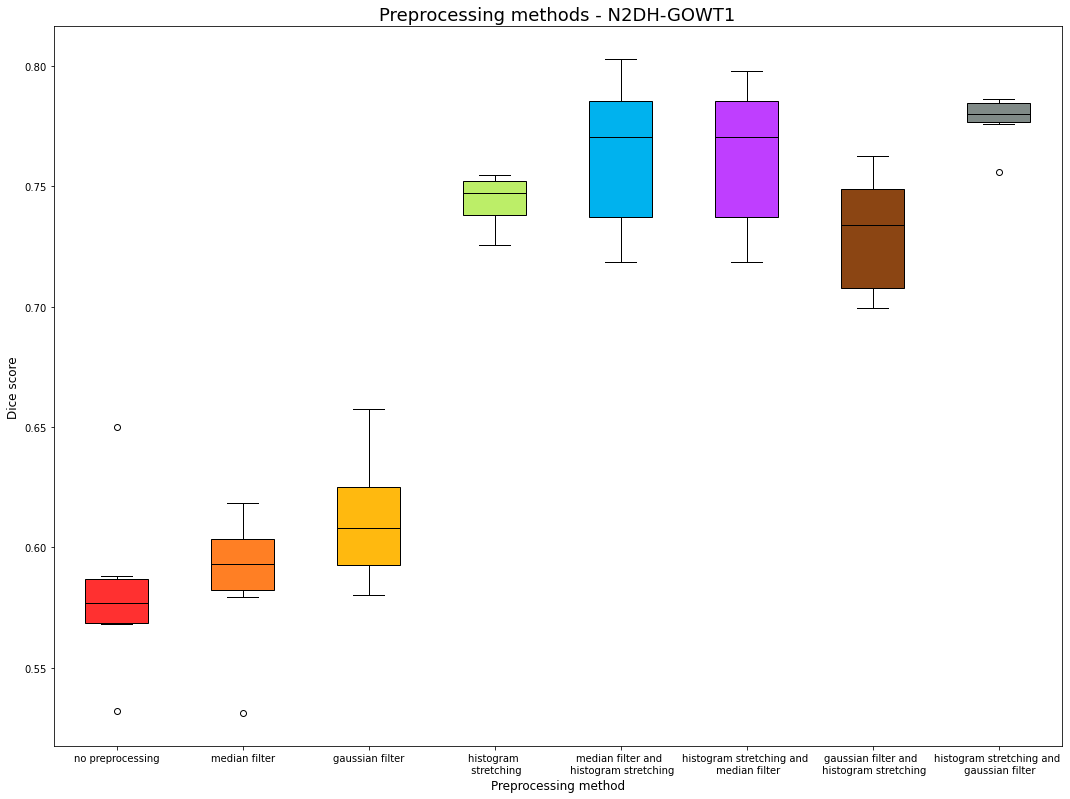

In [189]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - matplotlib

data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_histogram_stretching_median_filter , N2DH_GOWT1_gaussian_filter_histogram_stretching , N2DH_GOWT1_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DH-GOWT1' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DH_GOWT1, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)



Text(0.5, 0, 'Preprocessing method')

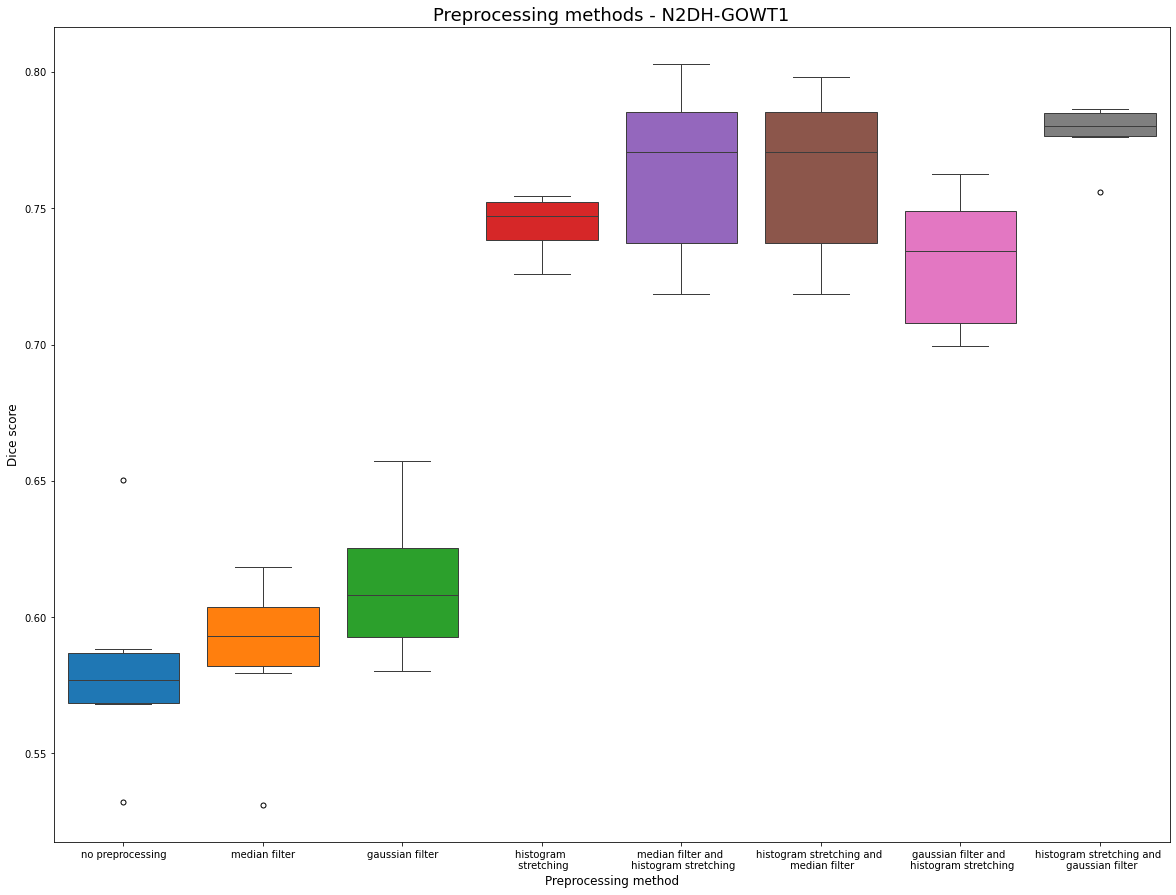

In [190]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - seaborn

data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : N2DH_GOWT1_no_preprocessing , 'median filter' : N2DH_GOWT1_median_filter , 'gaussian filter' : N2DH_GOWT1_gaussian_filter , 'histogram \n stretching' : N2DH_GOWT1_histogram_stretching , 'median filter and \n histogram stretching' : N2DH_GOWT1_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : N2DH_GOWT1_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : N2DH_GOWT1_gaussian_filter_histogram_stretching , 'histogram stretching and \n gaussian filter' : N2DH_GOWT1_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - N2DH-GOWT1' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

In [191]:
mean(N2DH_GOWT1_no_preprocessing)

0.5820119991342715

In [192]:
mean(N2DH_GOWT1_median_filter)

0.5868368244457095

In [193]:
mean(N2DH_GOWT1_gaussian_filter)

0.6120654105935351

In [194]:
mean(N2DH_GOWT1_histogram_stretching)

0.7439474265348033

In [195]:
mean(N2DH_GOWT1_median_filter_histogram_stretching)

0.7631669271403033

In [196]:
mean(N2DH_GOWT1_gaussian_filter_histogram_stretching)

0.7306377888207208

In [197]:
# Dice score - N2DLHeLa-dataset
## no preprocessing

N2DLHeLa_no_preprocessing = []

dice_otsu_img_N2DL_HeLa_1 = dsc.dice(otsu_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_img_N2DL_HeLa_2 = dsc.dice(otsu_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_img_N2DL_HeLa_3 = dsc.dice(otsu_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_img_N2DL_HeLa_4 = dsc.dice(otsu_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_no_preprocessing.extend([dice_otsu_img_N2DL_HeLa_1 , dice_otsu_img_N2DL_HeLa_2 , dice_otsu_img_N2DL_HeLa_3 , dice_otsu_img_N2DL_HeLa_4])

print(N2DLHeLa_no_preprocessing)


[0.6961222399023476, 0.65534219596258, 0.7806862514268343, 0.7806012094816297]


In [198]:
# Dice score - N2DLHeLa-dataset
## median filter

N2DLHeLa_median_filter = []

dice_otsu_median_img_N2DL_HeLa_1 = dsc.dice(otsu_median_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_median_img_N2DL_HeLa_2 = dsc.dice(otsu_median_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_median_img_N2DL_HeLa_3 = dsc.dice(otsu_median_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_median_img_N2DL_HeLa_4 = dsc.dice(otsu_median_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_median_filter.extend([dice_otsu_median_img_N2DL_HeLa_1 , dice_otsu_median_img_N2DL_HeLa_2 , dice_otsu_median_img_N2DL_HeLa_3 , dice_otsu_median_img_N2DL_HeLa_4])

print(N2DLHeLa_median_filter)

[0.7103253973374626, 0.6694136857682298, 0.7834791648873352, 0.7823174073771735]


In [199]:
# Dice score - N2DLHeLa-dataset
## gaussian filter

N2DLHeLa_gaussian_filter = []

dice_otsu_gauss_img_N2DL_HeLa_1 = dsc.dice(otsu_gauss_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_gauss_img_N2DL_HeLa_2 = dsc.dice(otsu_gauss_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_gauss_img_N2DL_HeLa_3 = dsc.dice(otsu_gauss_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_gauss_img_N2DL_HeLa_4 = dsc.dice(otsu_gauss_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_gaussian_filter.extend([dice_otsu_gauss_img_N2DL_HeLa_1 , dice_otsu_gauss_img_N2DL_HeLa_2 , dice_otsu_gauss_img_N2DL_HeLa_3 , dice_otsu_gauss_img_N2DL_HeLa_4])

print(N2DLHeLa_gaussian_filter)

[0.7316009375318455, 0.6874533683121135, 0.7635625807166325, 0.7646670453136668]


In [200]:
# Dice score - N2DLHeLa-dataset
## histogram stretching

N2DLHeLa_histogram_stretching = []

dice_otsu_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching.extend([dice_otsu_stretch_img_N2DL_HeLa_1 , dice_otsu_stretch_img_N2DL_HeLa_2 , dice_otsu_stretch_img_N2DL_HeLa_3 , dice_otsu_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching)

[0.809730635140136, 0.8146261556413248, 0.7972511209448173, 0.795759151830366]


In [201]:
# Dice score - N2DLHeLa-dataset
## median filter and histogram stretching

N2DLHeLa_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_median_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_median_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_median_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_median_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DL_HeLa_1 , dice_otsu_median_stretch_img_N2DL_HeLa_2 , dice_otsu_median_stretch_img_N2DL_HeLa_3 , dice_otsu_median_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_median_filter_histogram_stretching)

[0.8033765380826363, 0.8071817847470661, 0.7994136118387953, 0.7994622194888225]


In [202]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and median filter 

N2DLHeLa_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_median_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_median_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_median_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_median_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_N2DL_HeLa_1 , dice_otsu_stretch_median_img_N2DL_HeLa_2 , dice_otsu_stretch_median_img_N2DL_HeLa_3 , dice_otsu_stretch_median_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching_median_filter)

[0.8083639705882353, 0.8141226945021894, 0.8011127367379153, 0.8013222347823108]


In [203]:
# Dice score - N2DLHeLa-dataset
## gaussian filter and histogram stretching

N2DLHeLa_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DL_HeLa_1 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_gauss_stretch_img_N2DL_HeLa_2 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_gauss_stretch_img_N2DL_HeLa_3 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_gauss_stretch_img_N2DL_HeLa_4 = dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DL_HeLa_1 , dice_otsu_gauss_stretch_img_N2DL_HeLa_2 , dice_otsu_gauss_stretch_img_N2DL_HeLa_3 , dice_otsu_gauss_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_gaussian_filter_histogram_stretching)

[0.7538779201720107, 0.7774050799167492, 0.776937731532391, 0.7778779902344689]


In [204]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and gaussian filter 

N2DLHeLa_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_N2DL_HeLa_1 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_1 , binary_gt_N2DL_HeLa_1)
dice_otsu_stretch_gauss_img_N2DL_HeLa_2 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_2 , binary_gt_N2DL_HeLa_2)
dice_otsu_stretch_gauss_img_N2DL_HeLa_3 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_3 , binary_gt_N2DL_HeLa_3)
dice_otsu_stretch_gauss_img_N2DL_HeLa_4 = dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa_4 , binary_gt_N2DL_HeLa_4)

N2DLHeLa_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_N2DL_HeLa_1 , dice_otsu_stretch_gauss_img_N2DL_HeLa_2 , dice_otsu_stretch_gauss_img_N2DL_HeLa_3 , dice_otsu_stretch_gauss_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching_gaussian_filter)

[0.7901147146296559, 0.8031289427201614, 0.7853768764335839, 0.7862647140684347]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_17999/2862098958.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


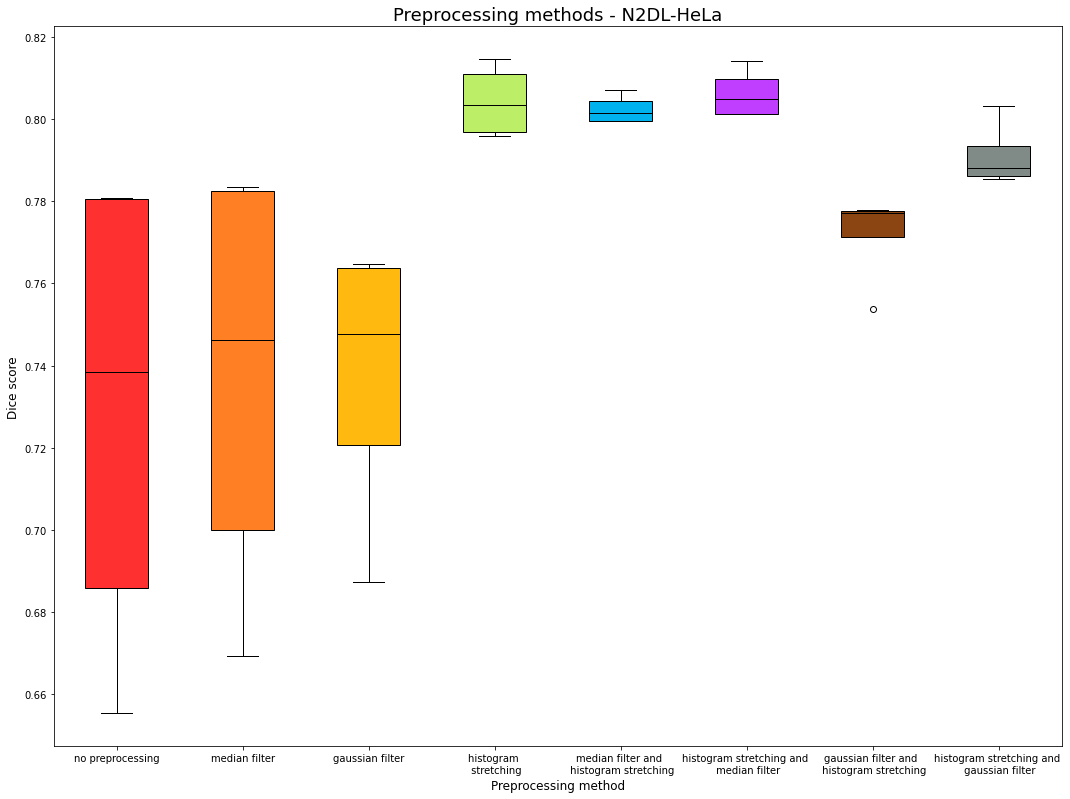

In [205]:
# Dice score - preprocessing - N2DLHeLa-dataset - boxplot

data_N2DLHeLa = [N2DLHeLa_no_preprocessing , N2DLHeLa_median_filter , N2DLHeLa_gaussian_filter , N2DLHeLa_histogram_stretching , N2DLHeLa_median_filter_histogram_stretching , N2DLHeLa_histogram_stretching_median_filter , N2DLHeLa_gaussian_filter_histogram_stretching , N2DLHeLa_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DL-HeLa' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DLHeLa, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

Text(0.5, 0, 'Preprocessing method')

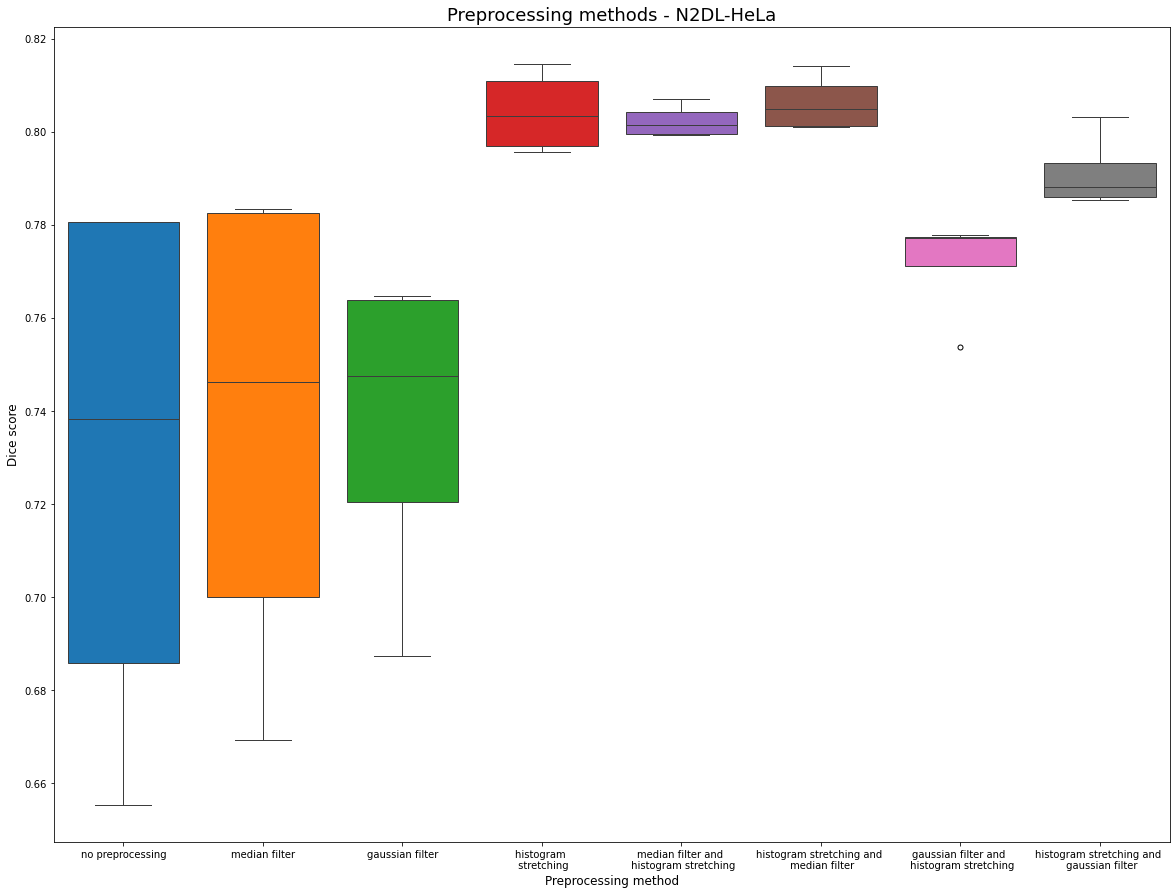

In [206]:
# Dice score - preprocessing - N2DL-HeLa-dataset - boxplot - seaborn

data_N2DL_HeLa = [N2DLHeLa_no_preprocessing , N2DLHeLa_median_filter , N2DLHeLa_gaussian_filter , N2DLHeLa_histogram_stretching , N2DLHeLa_median_filter_histogram_stretching , N2DLHeLa_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : N2DLHeLa_no_preprocessing , 'median filter' : N2DLHeLa_median_filter , 'gaussian filter' : N2DLHeLa_gaussian_filter , 'histogram \n stretching' : N2DLHeLa_histogram_stretching , 'median filter and \n histogram stretching' : N2DLHeLa_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : N2DLHeLa_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : N2DLHeLa_gaussian_filter_histogram_stretching ,'histogram stretching and \n gaussian filter' : N2DLHeLa_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - N2DL-HeLa' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

In [207]:
mean(N2DLHeLa_no_preprocessing)

0.7281879741933479

In [208]:
mean(N2DH_GOWT1_median_filter)

0.5868368244457095

In [209]:
mean(N2DH_GOWT1_gaussian_filter)

0.6120654105935351

In [210]:
mean(N2DLHeLa_histogram_stretching)

0.8043417658891611

In [211]:
mean(N2DLHeLa_median_filter_histogram_stretching)

0.80235853853933

In [212]:
mean(N2DLHeLa_gaussian_filter_histogram_stretching)

0.7715246804639049

In [213]:
# Dice score - NIH3T3-dataset
## no preprocessing

NIH3T3_no_preprocessing = []

dice_otsu_img_NIH3T3_1 = dsc.dice(otsu_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_img_NIH3T3_2 = dsc.dice(otsu_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_img_NIH3T3_3 = dsc.dice(otsu_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_img_NIH3T3_4 = dsc.dice(otsu_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_img_NIH3T3_5 = dsc.dice(otsu_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_img_NIH3T3_6 = dsc.dice(otsu_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_img_NIH3T3_7 = dsc.dice(otsu_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_img_NIH3T3_8 = dsc.dice(otsu_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_img_NIH3T3_9 = dsc.dice(otsu_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_img_NIH3T3_10 = dsc.dice(otsu_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_img_NIH3T3_11 = dsc.dice(otsu_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_img_NIH3T3_12 = dsc.dice(otsu_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_img_NIH3T3_13 = dsc.dice(otsu_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_img_NIH3T3_14 = dsc.dice(otsu_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_img_NIH3T3_15 = dsc.dice(otsu_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_img_NIH3T3_16 = dsc.dice(otsu_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_img_NIH3T3_17 = dsc.dice(otsu_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_img_NIH3T3_18 = dsc.dice(otsu_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_no_preprocessing.extend([dice_otsu_img_NIH3T3_1 , dice_otsu_img_NIH3T3_2 , dice_otsu_img_NIH3T3_3 , dice_otsu_img_NIH3T3_4 , dice_otsu_img_NIH3T3_5 , dice_otsu_img_NIH3T3_6 , dice_otsu_img_NIH3T3_7 , dice_otsu_img_NIH3T3_8 , dice_otsu_img_NIH3T3_9 , dice_otsu_img_NIH3T3_10 , dice_otsu_img_NIH3T3_11 , dice_otsu_img_NIH3T3_12 , dice_otsu_img_NIH3T3_13 , dice_otsu_img_NIH3T3_14 , dice_otsu_img_NIH3T3_15 , dice_otsu_img_NIH3T3_16 , dice_otsu_img_NIH3T3_17 , dice_otsu_img_NIH3T3_18])

print(NIH3T3_no_preprocessing)

[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]


In [214]:
# Dice score - N2DLHeLa-dataset
## median filter

NIH3T3_median_filter = []

dice_otsu_median_img_NIH3T3_1 = dsc.dice(otsu_median_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_median_img_NIH3T3_2 = dsc.dice(otsu_median_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_median_img_NIH3T3_3 = dsc.dice(otsu_median_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_median_img_NIH3T3_4 = dsc.dice(otsu_median_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_median_img_NIH3T3_5 = dsc.dice(otsu_median_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_median_img_NIH3T3_6 = dsc.dice(otsu_median_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_median_img_NIH3T3_7 = dsc.dice(otsu_median_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_median_img_NIH3T3_8 = dsc.dice(otsu_median_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_median_img_NIH3T3_9 = dsc.dice(otsu_median_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_median_img_NIH3T3_10 = dsc.dice(otsu_median_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_median_img_NIH3T3_11 = dsc.dice(otsu_median_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_median_img_NIH3T3_12 = dsc.dice(otsu_median_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_median_img_NIH3T3_13 = dsc.dice(otsu_median_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_median_img_NIH3T3_14 = dsc.dice(otsu_median_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_median_img_NIH3T3_15 = dsc.dice(otsu_median_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_median_img_NIH3T3_16 = dsc.dice(otsu_median_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_median_img_NIH3T3_17 = dsc.dice(otsu_median_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_median_img_NIH3T3_18 = dsc.dice(otsu_median_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_median_filter.extend([dice_otsu_median_img_NIH3T3_1 , dice_otsu_median_img_NIH3T3_2 , dice_otsu_median_img_NIH3T3_3 , dice_otsu_median_img_NIH3T3_4 , dice_otsu_median_img_NIH3T3_5 , dice_otsu_median_img_NIH3T3_6 , dice_otsu_median_img_NIH3T3_7 , dice_otsu_median_img_NIH3T3_8 , dice_otsu_median_img_NIH3T3_9 , dice_otsu_median_img_NIH3T3_10 , dice_otsu_median_img_NIH3T3_11 , dice_otsu_median_img_NIH3T3_12 , dice_otsu_median_img_NIH3T3_13 , dice_otsu_median_img_NIH3T3_14 , dice_otsu_median_img_NIH3T3_15 , dice_otsu_median_img_NIH3T3_16 , dice_otsu_median_img_NIH3T3_17 , dice_otsu_median_img_NIH3T3_18])

print(NIH3T3_median_filter)

[0.9080295797878731, 0.8787593324241103, 0.8240269286695534, 0.7274386713178076, 0.7667266042242559, 0.686254450403353, 0.6688452252743613, 0.7163285596108164, 0.03312478286129691, 0.4535714182153493, 0.0, 0.6756700217767795, 0.0, 0.5720907326399953, 0.6104348417019902, 0.047324730943574624, 0.074196645109135, 0.7870066342425532]


In [215]:
# Dice score - NIH3T3-dataset
## gaussian filter

NIH3T3_gaussian_filter = []

dice_otsu_gauss_img_NIH3T3_1 = dsc.dice(otsu_gauss_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_gauss_img_NIH3T3_2 = dsc.dice(otsu_gauss_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_gauss_img_NIH3T3_3 = dsc.dice(otsu_gauss_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_gauss_img_NIH3T3_4 = dsc.dice(otsu_gauss_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_gauss_img_NIH3T3_5 = dsc.dice(otsu_gauss_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_gauss_img_NIH3T3_6 = dsc.dice(otsu_gauss_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_gauss_img_NIH3T3_7 = dsc.dice(otsu_gauss_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_gauss_img_NIH3T3_8 = dsc.dice(otsu_gauss_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_gauss_img_NIH3T3_9 = dsc.dice(otsu_gauss_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_gauss_img_NIH3T3_10 = dsc.dice(otsu_gauss_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_gauss_img_NIH3T3_11 = dsc.dice(otsu_gauss_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_gauss_img_NIH3T3_12 = dsc.dice(otsu_gauss_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_gauss_img_NIH3T3_13 = dsc.dice(otsu_gauss_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_gauss_img_NIH3T3_14 = dsc.dice(otsu_gauss_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_gauss_img_NIH3T3_15 = dsc.dice(otsu_gauss_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_gauss_img_NIH3T3_16 = dsc.dice(otsu_gauss_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_gauss_img_NIH3T3_17 = dsc.dice(otsu_gauss_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_gauss_img_NIH3T3_18 = dsc.dice(otsu_gauss_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_gaussian_filter.extend([dice_otsu_gauss_img_NIH3T3_1 , dice_otsu_gauss_img_NIH3T3_2 , dice_otsu_gauss_img_NIH3T3_3 , dice_otsu_gauss_img_NIH3T3_4 , dice_otsu_gauss_img_NIH3T3_5 , dice_otsu_gauss_img_NIH3T3_6 , dice_otsu_gauss_img_NIH3T3_7 , dice_otsu_gauss_img_NIH3T3_8 , dice_otsu_gauss_img_NIH3T3_9 , dice_otsu_gauss_img_NIH3T3_10 , dice_otsu_gauss_img_NIH3T3_11 , dice_otsu_gauss_img_NIH3T3_12 , dice_otsu_gauss_img_NIH3T3_13 , dice_otsu_gauss_img_NIH3T3_14 , dice_otsu_gauss_img_NIH3T3_15 , dice_otsu_gauss_img_NIH3T3_16 , dice_otsu_gauss_img_NIH3T3_17 , dice_otsu_gauss_img_NIH3T3_18])

print(NIH3T3_gaussian_filter)

[0.907993566318502, 0.8914642943015147, 0.8069728047725139, 0.7264822742303453, 0.743519705020811, 0.6420592182889145, 0.6207132472419397, 0.7030006087153718, 0.030260801481780123, 0.45019557165768614, 0.5434791870819309, 0.6601628541706102, 0.00044470409738147764, 0.5661672581481676, 0.5944399257544475, 0.04954240979132784, 0.07923756299585849, 0.7585414842260363]


In [216]:
# Dice score - NIH3T3-dataset
## histogram stretching

NIH3T3_histogram_stretching = []

dice_otsu_stretch_img_NIH3T3_1 = dsc.dice(otsu_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_img_NIH3T3_2 = dsc.dice(otsu_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_img_NIH3T3_3 = dsc.dice(otsu_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_img_NIH3T3_4 = dsc.dice(otsu_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_img_NIH3T3_5 = dsc.dice(otsu_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_img_NIH3T3_6 = dsc.dice(otsu_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_img_NIH3T3_7 = dsc.dice(otsu_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_img_NIH3T3_8 = dsc.dice(otsu_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_img_NIH3T3_9 = dsc.dice(otsu_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_img_NIH3T3_10 = dsc.dice(otsu_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_img_NIH3T3_11 = dsc.dice(otsu_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_img_NIH3T3_12 = dsc.dice(otsu_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_img_NIH3T3_13 = dsc.dice(otsu_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_img_NIH3T3_14 = dsc.dice(otsu_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_img_NIH3T3_15 = dsc.dice(otsu_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_img_NIH3T3_16 = dsc.dice(otsu_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_img_NIH3T3_17 = dsc.dice(otsu_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_img_NIH3T3_18 = dsc.dice(otsu_stretch_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching.extend([dice_otsu_stretch_img_NIH3T3_1 , dice_otsu_stretch_img_NIH3T3_2 , dice_otsu_stretch_img_NIH3T3_3 , dice_otsu_stretch_img_NIH3T3_4 , dice_otsu_stretch_img_NIH3T3_5 , dice_otsu_stretch_img_NIH3T3_6 , dice_otsu_stretch_img_NIH3T3_7 , dice_otsu_stretch_img_NIH3T3_8 , dice_otsu_stretch_img_NIH3T3_9 , dice_otsu_stretch_img_NIH3T3_10 , dice_otsu_stretch_img_NIH3T3_11 , dice_otsu_stretch_img_NIH3T3_12 , dice_otsu_stretch_img_NIH3T3_13 , dice_otsu_stretch_img_NIH3T3_14 , dice_otsu_stretch_img_NIH3T3_15 , dice_otsu_stretch_img_NIH3T3_16 , dice_otsu_stretch_img_NIH3T3_17 , dice_otsu_stretch_img_NIH3T3_18])

print(NIH3T3_histogram_stretching)

[0.9128436675562167, 0.8845252721173281, 0.8248360803970239, 0.758336987687637, 0.7713626482081649, 0.7238225870669582, 0.6814227277548294, 0.750270864797426, 0.15958982821109705, 0.6201720440183929, 0.6454109779570866, 0.680536637820677, 0.5594608126656365, 0.5970450004221428, 0.6165448260228947, 0.594356565444854, 0.714806990589591, 0.7925039681767514]


In [217]:
# Dice score - NIH3T3-dataset
## median filter and histogram stretching

NIH3T3_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_NIH3T3_1 = dsc.dice(otsu_median_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_median_stretch_img_NIH3T3_2 = dsc.dice(otsu_median_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_median_stretch_img_NIH3T3_3 = dsc.dice(otsu_median_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_median_stretch_img_NIH3T3_4 = dsc.dice(otsu_median_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_median_stretch_img_NIH3T3_5 = dsc.dice(otsu_median_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_median_stretch_img_NIH3T3_6 = dsc.dice(otsu_median_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_median_stretch_img_NIH3T3_7 = dsc.dice(otsu_median_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_median_stretch_img_NIH3T3_8 = dsc.dice(otsu_median_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_median_stretch_img_NIH3T3_9 = dsc.dice(otsu_median_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_median_stretch_img_NIH3T3_10 = dsc.dice(otsu_median_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_median_stretch_img_NIH3T3_11 = dsc.dice(otsu_median_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_median_stretch_img_NIH3T3_12 = dsc.dice(otsu_median_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_median_stretch_img_NIH3T3_13 = dsc.dice(otsu_median_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_median_stretch_img_NIH3T3_14 = dsc.dice(otsu_median_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_median_stretch_img_NIH3T3_15 = dsc.dice(otsu_median_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_median_stretch_img_NIH3T3_16 = dsc.dice(otsu_median_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_median_stretch_img_NIH3T3_17 = dsc.dice(otsu_median_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_median_stretch_img_NIH3T3_18 = dsc.dice(otsu_median_stretch_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_NIH3T3_1 , dice_otsu_median_stretch_img_NIH3T3_2 , dice_otsu_median_stretch_img_NIH3T3_3 , dice_otsu_median_stretch_img_NIH3T3_4 , dice_otsu_median_stretch_img_NIH3T3_5 , dice_otsu_median_stretch_img_NIH3T3_6 , dice_otsu_median_stretch_img_NIH3T3_7 , dice_otsu_median_stretch_img_NIH3T3_8 , dice_otsu_median_stretch_img_NIH3T3_9 , dice_otsu_median_stretch_img_NIH3T3_10 , dice_otsu_median_stretch_img_NIH3T3_11 , dice_otsu_median_stretch_img_NIH3T3_12 , dice_otsu_median_stretch_img_NIH3T3_13 , dice_otsu_median_stretch_img_NIH3T3_14 , dice_otsu_median_stretch_img_NIH3T3_15 , dice_otsu_median_stretch_img_NIH3T3_16 , dice_otsu_median_stretch_img_NIH3T3_17 , dice_otsu_median_stretch_img_NIH3T3_18])

print(NIH3T3_median_filter_histogram_stretching)

[0.9080295797878731, 0.9080746699707551, 0.8240269286695534, 0.7523092096313426, 0.7667266042242559, 0.7210834846002242, 0.6796112266384551, 0.7467162829788587, 0.1537407710034592, 0.61035447425189, 0.6454520836896415, 0.676574551172507, 0.5441254230662401, 0.5872934791498239, 0.6104348417019902, 0.6002316933870171, 0.737465149556319, 0.7870066342425532]


In [218]:
# Dice score - NIH3T3-dataset
## histogram stretching and median filter

NIH3T3_histogram_stretching_median_filter = []

dice_otsu_stretch_median_img_NIH3T3_1 = dsc.dice(otsu_stretch_median_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_median_img_NIH3T3_2 = dsc.dice(otsu_stretch_median_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_median_img_NIH3T3_3 = dsc.dice(otsu_stretch_median_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_median_img_NIH3T3_4 = dsc.dice(otsu_stretch_median_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_median_img_NIH3T3_5 = dsc.dice(otsu_stretch_median_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_median_img_NIH3T3_6 = dsc.dice(otsu_stretch_median_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_median_img_NIH3T3_7 = dsc.dice(otsu_stretch_median_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_median_img_NIH3T3_8 = dsc.dice(otsu_stretch_median_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_median_img_NIH3T3_9 = dsc.dice(otsu_stretch_median_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_median_img_NIH3T3_10 = dsc.dice(otsu_stretch_median_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_median_img_NIH3T3_11 = dsc.dice(otsu_stretch_median_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_median_img_NIH3T3_12 = dsc.dice(otsu_stretch_median_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_median_img_NIH3T3_13 = dsc.dice(otsu_stretch_median_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_median_img_NIH3T3_14 = dsc.dice(otsu_stretch_median_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_median_img_NIH3T3_15 = dsc.dice(otsu_stretch_median_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_median_img_NIH3T3_16 = dsc.dice(otsu_stretch_median_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_median_img_NIH3T3_17 = dsc.dice(otsu_stretch_median_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_median_img_NIH3T3_18 = dsc.dice(otsu_stretch_median_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching_median_filter.extend([dice_otsu_stretch_median_img_NIH3T3_1 , dice_otsu_stretch_median_img_NIH3T3_2 ,dice_otsu_stretch_median_img_NIH3T3_3 , dice_otsu_stretch_median_img_NIH3T3_4 , dice_otsu_stretch_median_img_NIH3T3_5 , dice_otsu_stretch_median_img_NIH3T3_6 , dice_otsu_stretch_median_img_NIH3T3_7 , dice_otsu_stretch_median_img_NIH3T3_8 , dice_otsu_stretch_median_img_NIH3T3_9 , dice_otsu_stretch_median_img_NIH3T3_10 , dice_otsu_stretch_median_img_NIH3T3_11 , dice_otsu_stretch_median_img_NIH3T3_12 , dice_otsu_stretch_median_img_NIH3T3_13 , dice_otsu_stretch_median_img_NIH3T3_14 , dice_otsu_stretch_median_img_NIH3T3_15 , dice_otsu_stretch_median_img_NIH3T3_16 , dice_otsu_stretch_median_img_NIH3T3_17 , dice_otsu_stretch_median_img_NIH3T3_18])

print(NIH3T3_histogram_stretching_median_filter)

[0.9080295797878731, 0.9080746699707551, 0.8240269286695534, 0.7724887801431431, 0.7667266042242559, 0.7210834846002242, 0.6796112266384551, 0.7467162829788587, 0.14073558302041628, 0.6132868643398939, 0.6454520836896415, 0.676574551172507, 0.5303260587919079, 0.5892559263596057, 0.6104348417019902, 0.6002316933870171, 0.7058765194582386, 0.7870066342425532]


In [219]:
# Dice score - NIH3T3-dataset
## gaussian filter and histogram stretching

thresholded = [otsu_gauss_stretch_img_NIH3T3_1 , otsu_gauss_stretch_img_NIH3T3_2 , otsu_gauss_stretch_img_NIH3T3_3, otsu_gauss_stretch_img_NIH3T3_4 , otsu_gauss_stretch_img_NIH3T3_5 , otsu_gauss_stretch_img_NIH3T3_6 , otsu_gauss_stretch_img_NIH3T3_7 , otsu_gauss_stretch_img_NIH3T3_8 , otsu_gauss_stretch_img_NIH3T3_9 , otsu_gauss_stretch_img_NIH3T3_10 , otsu_gauss_stretch_img_NIH3T3_11 , otsu_gauss_stretch_img_NIH3T3_12 , otsu_gauss_stretch_img_NIH3T3_13 , otsu_gauss_stretch_img_NIH3T3_14 , otsu_gauss_stretch_img_NIH3T3_15 , otsu_gauss_stretch_img_NIH3T3_16 , otsu_gauss_stretch_img_NIH3T3_17 , otsu_gauss_stretch_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_NIH3T3_1 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_gauss_stretch_img_NIH3T3_2 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_gauss_stretch_img_NIH3T3_3 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_gauss_stretch_img_NIH3T3_4 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_gauss_stretch_img_NIH3T3_5 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_gauss_stretch_img_NIH3T3_6 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_gauss_stretch_img_NIH3T3_7 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_gauss_stretch_img_NIH3T3_8 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_gauss_stretch_img_NIH3T3_9 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_gauss_stretch_img_NIH3T3_10 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_gauss_stretch_img_NIH3T3_11 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_gauss_stretch_img_NIH3T3_12 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_gauss_stretch_img_NIH3T3_13 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_gauss_stretch_img_NIH3T3_14 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_gauss_stretch_img_NIH3T3_15 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_gauss_stretch_img_NIH3T3_16 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_gauss_stretch_img_NIH3T3_17 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_gauss_stretch_img_NIH3T3_18 = dsc.dice(otsu_gauss_stretch_img_NIH3T3_18 , gt_NIH3T3_18)

NIH3T3_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_NIH3T3_1 , dice_otsu_gauss_stretch_img_NIH3T3_2 , dice_otsu_gauss_stretch_img_NIH3T3_3 , dice_otsu_gauss_stretch_img_NIH3T3_4 , dice_otsu_gauss_stretch_img_NIH3T3_5 , dice_otsu_gauss_stretch_img_NIH3T3_6 , dice_otsu_gauss_stretch_img_NIH3T3_7 , dice_otsu_gauss_stretch_img_NIH3T3_8 , dice_otsu_gauss_stretch_img_NIH3T3_9 , dice_otsu_gauss_stretch_img_NIH3T3_10 , dice_otsu_gauss_stretch_img_NIH3T3_11 , dice_otsu_gauss_stretch_img_NIH3T3_12 , dice_otsu_gauss_stretch_img_NIH3T3_13 , dice_otsu_gauss_stretch_img_NIH3T3_14 , dice_otsu_gauss_stretch_img_NIH3T3_15 , dice_otsu_gauss_stretch_img_NIH3T3_16 , dice_otsu_gauss_stretch_img_NIH3T3_17 , dice_otsu_gauss_stretch_img_NIH3T3_18])

print(NIH3T3_gaussian_filter_histogram_stretching)

[0.9206818274556462, 0.9042496898242074, 0.8059397896791834, 0.7549833564314117, 0.7635112715002109, 0.709608783227893, 0.6532949854804793, 0.7276076181508921, 0.14144978028412977, 0.5754883175249997, 0.6176824388858773, 0.6580282786270863, 0.5211169793703131, 0.5693860861597996, 0.5943130187402467, 0.5720255025406666, 0.7025606816282592, 0.7488933336040774]


In [220]:
# Dice score - NIH3T3-dataset
## histogram stretching and gaussian filter

NIH3T3_histogram_stretching_gaussian_filter = []

dice_otsu_stretch_gauss_img_NIH3T3_1 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_1 , gt_NIH3T3_1)
dice_otsu_stretch_gauss_img_NIH3T3_2 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_2 , gt_NIH3T3_2)
dice_otsu_stretch_gauss_img_NIH3T3_3 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_3 , gt_NIH3T3_3)
dice_otsu_stretch_gauss_img_NIH3T3_4 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_4 , gt_NIH3T3_4)
dice_otsu_stretch_gauss_img_NIH3T3_5 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_5 , gt_NIH3T3_5)
dice_otsu_stretch_gauss_img_NIH3T3_6 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_6 , gt_NIH3T3_6)
dice_otsu_stretch_gauss_img_NIH3T3_7 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_7 , gt_NIH3T3_7)
dice_otsu_stretch_gauss_img_NIH3T3_8 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_8 , gt_NIH3T3_8)
dice_otsu_stretch_gauss_img_NIH3T3_9 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_9 , gt_NIH3T3_9)
dice_otsu_stretch_gauss_img_NIH3T3_10 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_10 , gt_NIH3T3_10)
dice_otsu_stretch_gauss_img_NIH3T3_11 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_11 , gt_NIH3T3_11)
dice_otsu_stretch_gauss_img_NIH3T3_12 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_12 , gt_NIH3T3_12)
dice_otsu_stretch_gauss_img_NIH3T3_13 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_13 , gt_NIH3T3_13)
dice_otsu_stretch_gauss_img_NIH3T3_14 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_14 , gt_NIH3T3_14)
dice_otsu_stretch_gauss_img_NIH3T3_15 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_15 , gt_NIH3T3_15)
dice_otsu_stretch_gauss_img_NIH3T3_16 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_16 , gt_NIH3T3_16)
dice_otsu_stretch_gauss_img_NIH3T3_17 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_17 , gt_NIH3T3_17)
dice_otsu_stretch_gauss_img_NIH3T3_18 = dsc.dice(otsu_stretch_gauss_img_NIH3T3_18 , gt_NIH3T3_18)



NIH3T3_histogram_stretching_gaussian_filter.extend([dice_otsu_stretch_gauss_img_NIH3T3_1 , dice_otsu_stretch_gauss_img_NIH3T3_2 ,dice_otsu_stretch_gauss_img_NIH3T3_3 , dice_otsu_stretch_gauss_img_NIH3T3_4 , dice_otsu_stretch_gauss_img_NIH3T3_5 , dice_otsu_stretch_gauss_img_NIH3T3_6 , dice_otsu_stretch_gauss_img_NIH3T3_7 , dice_otsu_stretch_gauss_img_NIH3T3_8 , dice_otsu_stretch_gauss_img_NIH3T3_9 , dice_otsu_stretch_gauss_img_NIH3T3_10 , dice_otsu_stretch_gauss_img_NIH3T3_11 , dice_otsu_stretch_gauss_img_NIH3T3_12 , dice_otsu_stretch_gauss_img_NIH3T3_13 , dice_otsu_stretch_gauss_img_NIH3T3_14 , dice_otsu_stretch_gauss_img_NIH3T3_15 , dice_otsu_stretch_gauss_img_NIH3T3_16 , dice_otsu_stretch_gauss_img_NIH3T3_17 , dice_otsu_stretch_gauss_img_NIH3T3_18])

print(NIH3T3_histogram_stretching_gaussian_filter)

[0.9243979120340546, 0.9059355062148189, 0.8055670025283973, 0.7546714849415406, 0.7642509127215305, 0.7110734376824667, 0.6532941024547996, 0.7274787835458288, 0.14643436931562578, 0.5740106690586361, 0.6202289439060715, 0.6565728699391807, 0.5089780026613658, 0.5694252140882895, 0.5941469789194952, 0.577431373891274, 0.7096609579404709, 0.7487312092083761]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_17999/3156945178.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


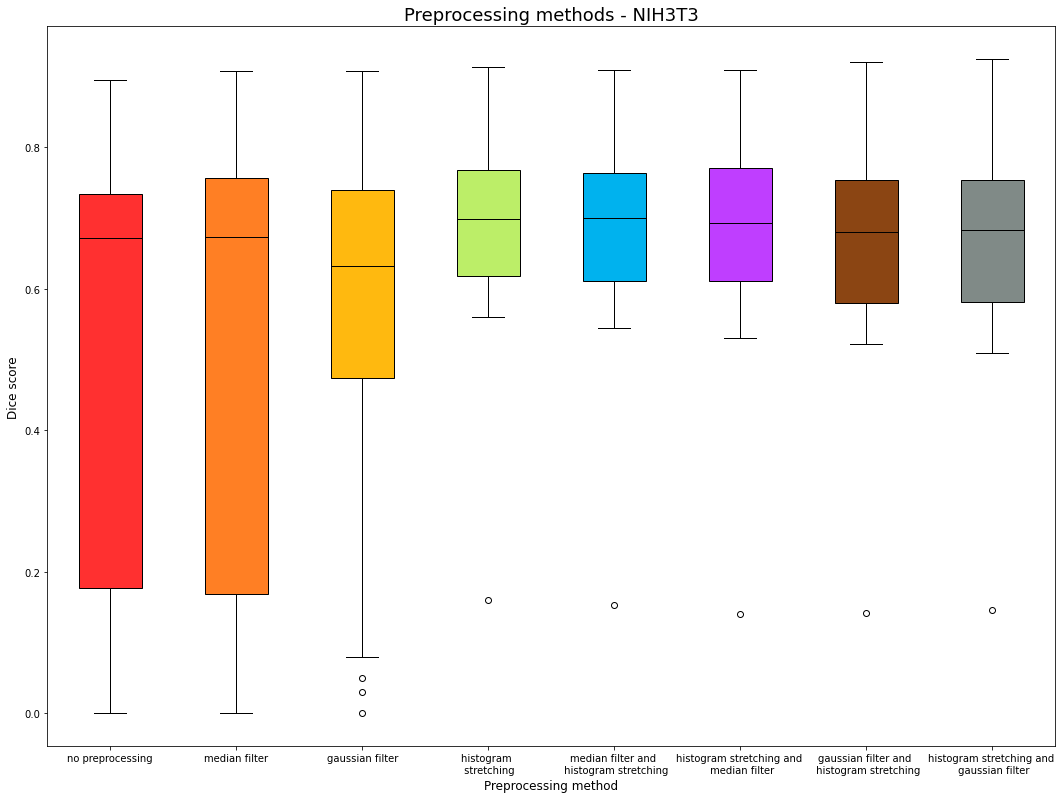

In [221]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot

data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_histogram_stretching_median_filter , NIH3T3_gaussian_filter_histogram_stretching , NIH3T3_histogram_stretching_gaussian_filter]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_NIH3T3, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

Text(0.5, 0, 'Preprocessing method')

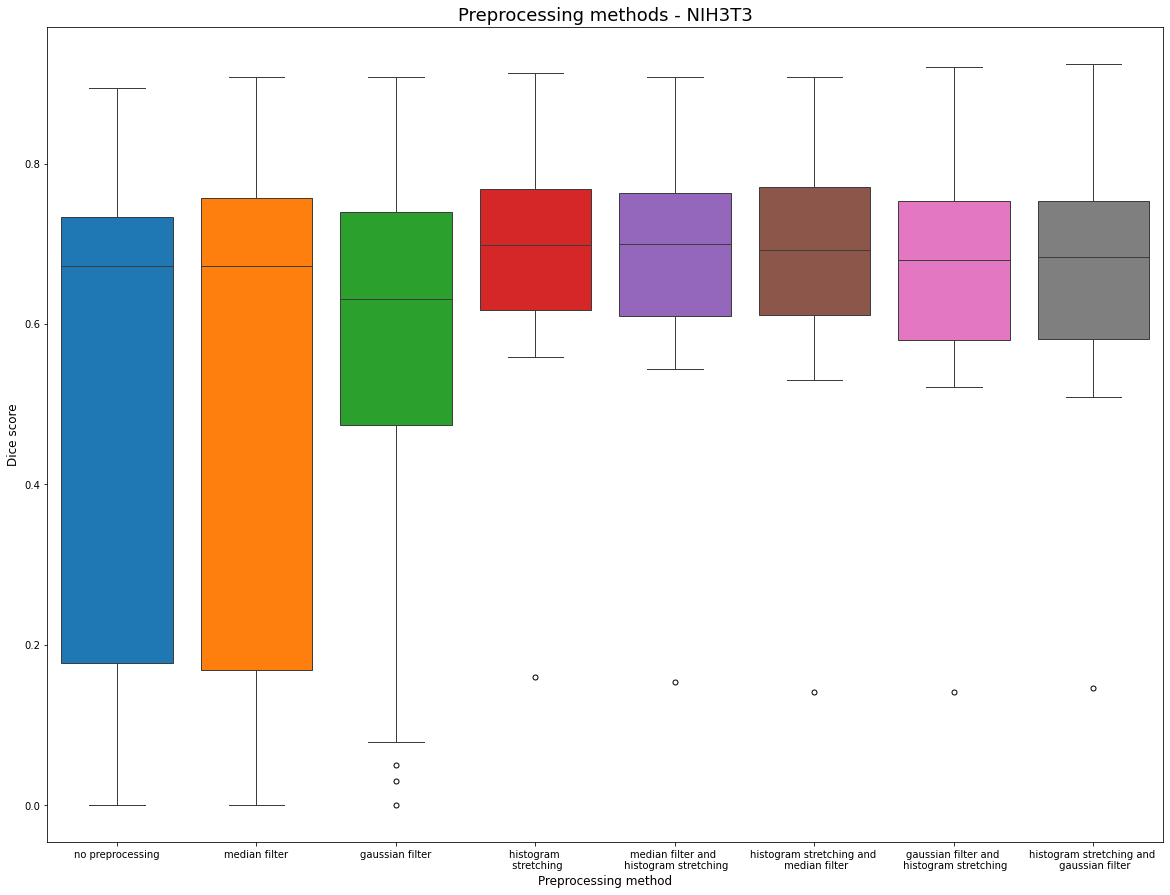

In [222]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot - seaborn

data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_gaussian_filter_histogram_stretching]
df = pd.DataFrame({'no preprocessing' : NIH3T3_no_preprocessing , 'median filter' : NIH3T3_median_filter , 'gaussian filter' : NIH3T3_gaussian_filter , 'histogram \n stretching' : NIH3T3_histogram_stretching , 'median filter and \n histogram stretching' : NIH3T3_median_filter_histogram_stretching , 'histogram stretching and \n median filter' : NIH3T3_histogram_stretching_median_filter , 'gaussian filter and \n histogram stretching' : NIH3T3_gaussian_filter_histogram_stretching , 'histogram stretching and \n gaussian filter' : NIH3T3_histogram_stretching_gaussian_filter})
df_melted = pd.melt(df)

plt.figure(figsize=(20,15))
sns.boxplot(x = 'variable' , y = 'value' , data = df_melted  , saturation = 1 , linewidth = 1 , showmeans = False , flierprops = {"marker":"o" , "markerfacecolor":"white" , "markeredgecolor":"black" , "markersize":"5"})
# meanprops={"marker":"+" , "markeredgecolor":"black" , "markersize":"5"}
# sns.swarmplot(x = 'variable' , y = 'value' , data = df_melted , color = '.25')
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)

In [223]:
mean(NIH3T3_no_preprocessing)

0.5264089707099551

In [224]:
mean(NIH3T3_median_filter)

0.5238793977334892

In [225]:
mean(NIH3T3_gaussian_filter)

0.5430376376830633

In [226]:
mean(NIH3T3_histogram_stretching)

0.6826582492730393

In [227]:
mean(NIH3T3_median_filter_histogram_stretching)

0.68106983820682

In [228]:
mean(NIH3T3_gaussian_filter_histogram_stretching)

0.66337898550641

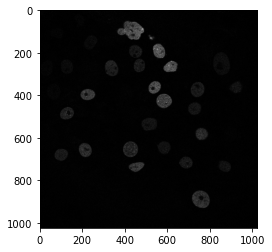

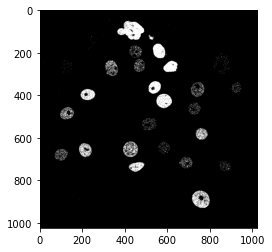

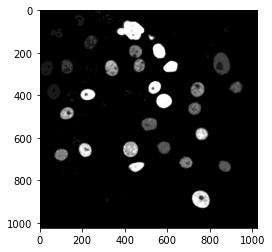

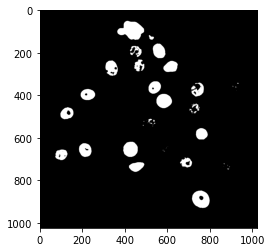

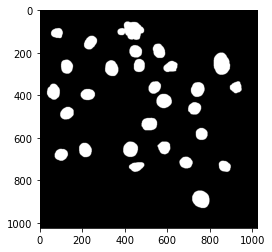

In [229]:
# Good examples for report - N2DH-GOWT1

figure()
imshow(img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(otsu_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(median_stretch_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(otsu_median_stretch_img_N2DH_GOWT1_6 , 'gray')

figure()
imshow(binary_gt_N2DH_GOWT1_6 , 'gray')

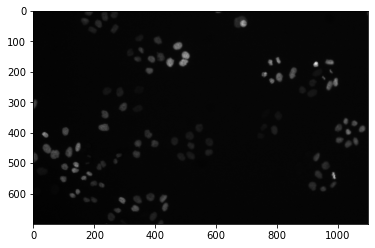

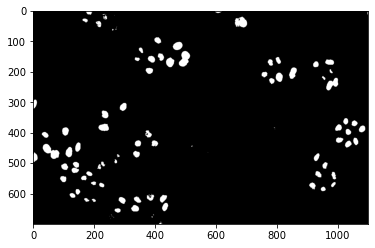

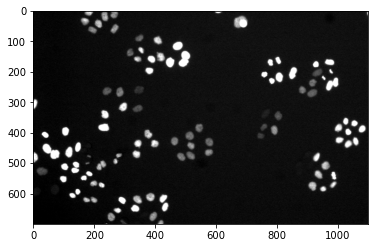

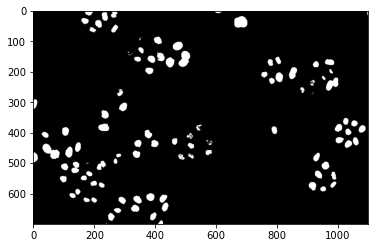

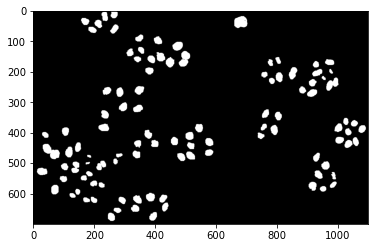

In [230]:
# Good examples for report - N2DL-HeLa

figure()
imshow(img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(stretch_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_stretch_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(binary_gt_N2DL_HeLa_2 , 'gray')

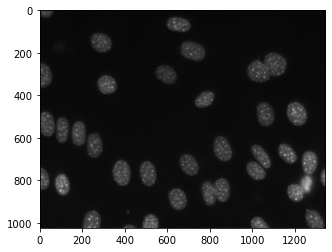

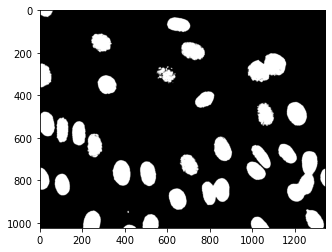

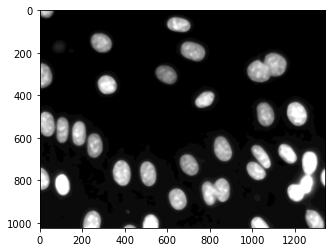

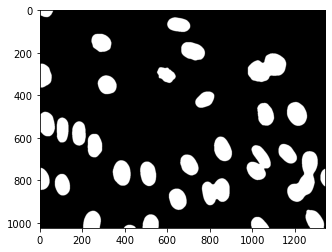

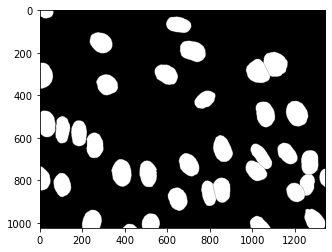

In [231]:
# Good examples for report - NIH3T3

figure()
imshow(img_NIH3T3_1 , 'gray')

figure()
imshow(otsu_img_NIH3T3_1 , 'gray')

figure()
imshow(median_stretch_img_NIH3T3_1 , 'gray')

figure()
imshow(otsu_median_stretch_img_NIH3T3_1 , 'gray')

figure()
imshow(gt_NIH3T3_1 , 'gray')

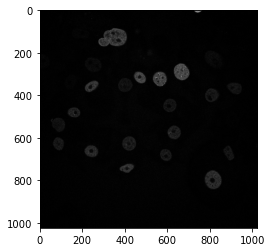

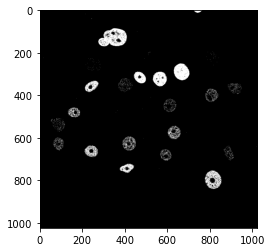

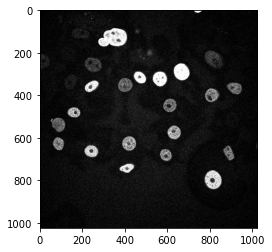

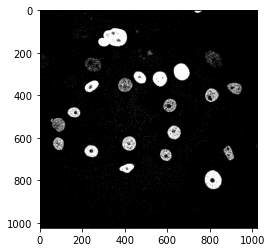

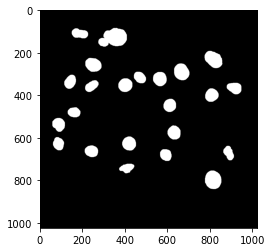

In [232]:
# Bad examples for report - N2DH-GOWT1

figure()
imshow(img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(otsu_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(stretch_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(otsu_stretch_img_N2DH_GOWT1_1 , 'gray')

figure()
imshow(binary_gt_N2DH_GOWT1_1 , 'gray')

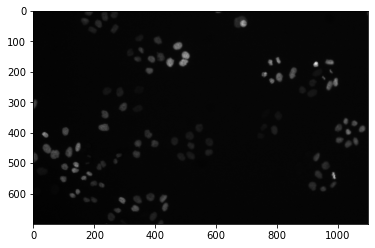

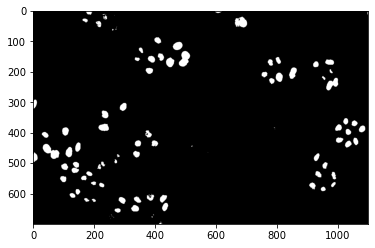

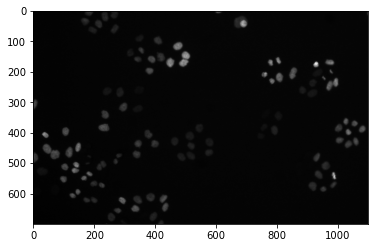

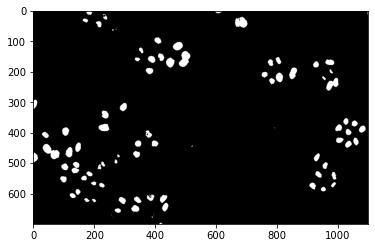

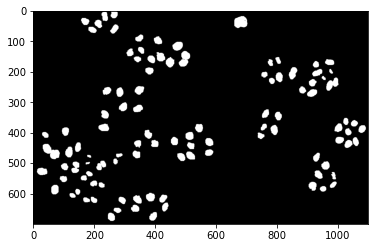

In [233]:
# Bad examples for report - N2DL-HeLa

figure()
imshow(img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(median_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(otsu_median_img_N2DL_HeLa_2 , 'gray')

figure()
imshow(binary_gt_N2DL_HeLa_2 , 'gray')

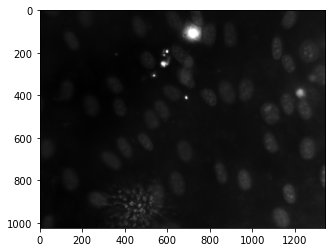

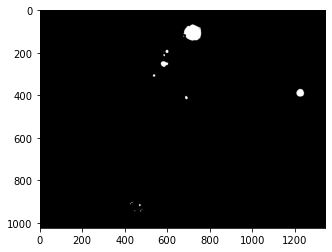

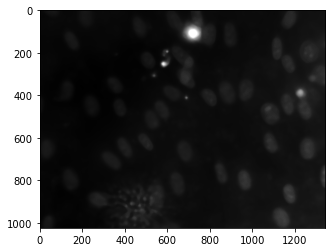

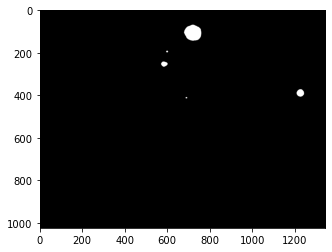

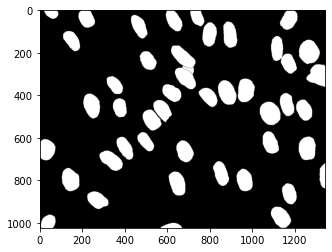

In [234]:
# Bad examples for report - NIH3T3

figure()
imshow(img_NIH3T3_11 , 'gray')

figure()
imshow(otsu_img_NIH3T3_11 , 'gray')

figure()
imshow(median_img_NIH3T3_11 , 'gray')

figure()
imshow(otsu_median_img_NIH3T3_11 , 'gray')

figure()
imshow(gt_NIH3T3_11 , 'gray')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

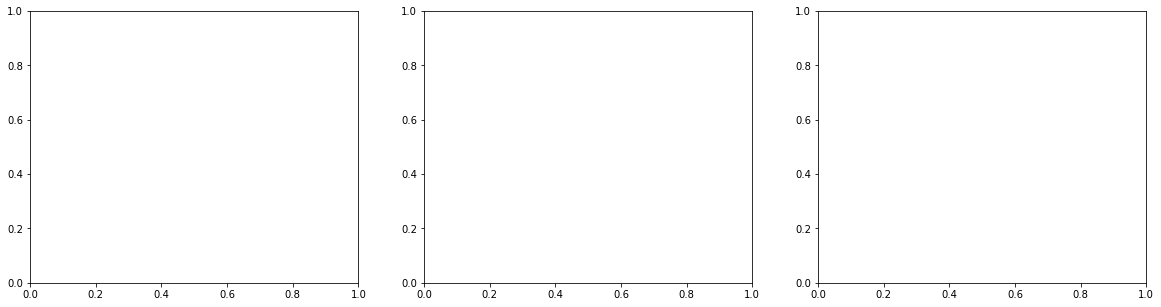

In [242]:
figure , axis = plt.subplots(1 , 3 , figsize = (20 , 5))
Y = np.arange(0 , 1)

for i in range (1)
    for j in range(3)

    ax[i][j]
    ax[i][j]
    ax[i][j]
X1 = data_N2DH_GOWT1
X2 = data_N2DLHeLa
X3 = data_NIH3T3

Y = np.arange(0 , 1)

figure , axis = plt.subplots(1 , 3 , figsize = (20 , 5))

axis [0 , 0].pp.dataset_boxplot_otsu(X1 , Y)
axis [0 , 0].set.title('Preprocessing methods - N2DH-GOWT1')

axis [1 , 0].dataset_boxplot_otsu(X2 , Y)
axis [1 , 0].set_title('Preprocessing methods - N2DL-HeLa')

axis [2 , 0].dataset_boxplot_otsu(X3 , Y)
axis [2 , 0].set_title('Preprocessing methods - NIH3T3')

plt.show()